# Dissertation-Model

## 01 Data cleaning and calculate the contants of route and stops

In [1]:
import os
import codecs
import glob
import pandas as pd
import sys
import geopandas as gpd
import re
import fiona

#import geopandas as gdp
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)


In [2]:
def my_datatime(T,columname,columname24):
    i=0
    for i in range(len(T)):  
        #print(i)
        if  int(re.split(r':',T.loc[i,columname])[0])<=23:
            T.loc[i,columname24] = pd.to_datetime(T.loc[i,columname],format='%H:%M:%S')
            
    
    return T.head()
                
 #if re.split(r':',T.loc[i,columname])[0]=='24':
               # T.loc[i,columname] =T.loc[i,columname].replace('24', '00')
               # T.loc[i,columname] = datetime.datetime.strptime(str(T.loc[i,columname]), "%H:%M:%S")
                #T.loc[i,columname] =T.loc[i,columname]+datetime.timedelta(days=1)
           # if re.split(r':',T.loc[i,columname])[0]=='25':
               # T.loc[i,columname] =T.loc[i,columname].replace('25', '00')
               # T.loc[i,columname] = datetime.datetime.strptime(str(T.loc[i,columname]), "%H:%M:%S")
               # T.loc[i,columname] =T.loc[i,columname]+datetime.timedelta(days=1)

### route

In [3]:
routes = pd.read_csv('./data/TfGMgtfsnew/routes.txt', sep=',')
routes.shape

(1533, 5)

In [4]:
routes[routes.route_short_name=='100']

,route_id,agency_id,route_short_name,route_long_name,route_type
407,GONW100C:I:2021-04-27,GONW,100,Warrington - Irlam - intu Trafford Centre - Ec...,3
408,GONW100C:O:2021-04-27,GONW,100,Manchester - Salford Shopping Centre - Eccles ...,3


In [5]:
routes_bus= routes[routes.route_type==3]
routes_bus.shape

(1521, 5)

In [6]:
routes_bus['CpnNumber']= routes_bus['route_id'].map(lambda x:re.split(r':',x)[0])
routes_bus['Direction']= routes_bus['route_id'].map(lambda x:re.split(r':',x)[1])
routes_bus['Date']= routes_bus['route_id'].map(lambda x:re.split(r':',x)[2])
routes_sum=routes_bus.drop(['Date','route_type'],axis=1)
routes_sum.head(20)

<ipython-input-6-f8ff8e06e61a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  routes_bus['CpnNumber']= routes_bus['route_id'].map(lambda x:re.split(r':',x)[0])
<ipython-input-6-f8ff8e06e61a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  routes_bus['Direction']= routes_bus['route_id'].map(lambda x:re.split(r':',x)[1])
<ipython-input-6-f8ff8e06e61a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See t

,route_id,agency_id,route_short_name,route_long_name,CpnNumber,Direction
0,AMSY034C:I:2021-05-24,AMSY,34,Leigh Bus Station - St Helens Bus Station,AMSY034C,I
1,AMSY034C:O:2021-05-24,AMSY,34,St Helens Bus Station - Leigh Bus Station,AMSY034C,O
2,AMSY320:I:2021-05-24,AMSY,320,Wigan Bus Station - St Helens Bus Station,AMSY320,I
3,AMSY320:O:2021-05-24,AMSY,320,St Helens Bus Station - Wigan Bus Station,AMSY320,O
4,AMSY352A:I:2021-05-24,AMSY,352,Wigan Bus Station - St Helens Bus Station,AMSY352A,I
5,AMSY352A:O:2021-05-24,AMSY,352,St Helens Bus Station - Wigan Bus Station,AMSY352A,O
6,AMSY360A:I:2021-05-24,AMSY,360,Warrington Bus Station - Wigan Bus Station,AMSY360A,I
7,AMSY360A:O:2021-05-24,AMSY,360,Wigan Bus Station - Warrington Bus Station,AMSY360A,O
8,AMSY375B:I:2021-05-24,AMSY,375,Wigan - Southport,AMSY375B,I
9,AMSY375B:O:2021-05-24,AMSY,375,Southport - Wigan,AMSY375B,O


## trips

In [7]:
trips = pd.read_csv('./data/TfGMgtfsnew/trips.txt', sep=',')
trips.shape

(84559, 4)

In [8]:
trips.head()

,route_id,service_id,trip_id,trip_headsign
0,AMSY034C:I:2021-05-24,SID00001,AMSY034C:034MFAMJ:I:1:2021-05-24,St Helens
1,AMSY034C:I:2021-05-24,SID00001,AMSY034C:034MFAMJ:I:2:2021-05-24,St Helens
2,AMSY034C:I:2021-05-24,SID00001,AMSY034C:034MFAMJ:I:3:2021-05-24,St Helens
3,AMSY034C:I:2021-05-24,SID00001,AMSY034C:034MFAMJ:I:4:2021-05-24,St Helens
4,AMSY034C:I:2021-05-24,SID00001,AMSY034C:034MFAMJ:I:5:2021-05-24,St Helens


In [9]:
routetrip = trips.groupby(['route_id','service_id']).count()
#routetrip.columns=routetrip.columns.get_level_values(1)
routetrip.head()

trip_id  trip_headsign
route_id              service_id                        
AMSY034C:I:2021-05-24 SID00001         29             29
                      SID00002         29             29
                      SID00003         15             15
AMSY034C:O:2021-05-24 SID00001         29             29
                      SID00002         28             28

In [10]:
routetrip=routetrip.reset_index()
routetrip.rename(columns={'trip_id':'Ln'}, inplace=True)  
routetrip2=routetrip.drop(['trip_headsign'],axis=1)
routetrip2.head()

,route_id,service_id,Ln
0,AMSY034C:I:2021-05-24,SID00001,29
1,AMSY034C:I:2021-05-24,SID00002,29
2,AMSY034C:I:2021-05-24,SID00003,15
3,AMSY034C:O:2021-05-24,SID00001,29
4,AMSY034C:O:2021-05-24,SID00002,28


In [11]:
routetrip2['CpnNumber']= routetrip2['route_id'].map(lambda x:re.split(r':',x)[0])
routetrip2['Direction']= routetrip2['route_id'].map(lambda x:re.split(r':',x)[1])
routetrip2.head()

,route_id,service_id,Ln,CpnNumber,Direction
0,AMSY034C:I:2021-05-24,SID00001,29,AMSY034C,I
1,AMSY034C:I:2021-05-24,SID00002,29,AMSY034C,I
2,AMSY034C:I:2021-05-24,SID00003,15,AMSY034C,I
3,AMSY034C:O:2021-05-24,SID00001,29,AMSY034C,O
4,AMSY034C:O:2021-05-24,SID00002,28,AMSY034C,O


In [12]:
routetrip2[(routetrip2.Direction=='I')].shape

(1633, 5)

In [13]:
routetrip2[(routetrip2.Direction=='O')].shape

(2053, 5)

In [14]:
routetrip2.shape

(3686, 5)

In [15]:
#routetrip2.loc[350:500,]

In [16]:
#tt=routetrip2.loc[37,'CpnNumber']
tt='BEVAX100C'   #
print(tt)
AG=tt[0:4]
print(AG)
kk = re.compile(r'[0-9A-Z]+[0-9A-Z]*') 
OO = re.compile(r'[1-9A-Z]+[0-9A-Z]*$')    #只是去掉0
x=kk.findall(tt[4:])[0]
print(x)
if x[0]=='0': 
    x= OO.findall(x)[0]
print(x)

len(kk.findall(tt[4:]))

BEVAX100C
BEVA
X100C
X100C


1

In [17]:
#CO = re.compile(r'[A-Za-z]*')
#CO.findall(tt[4:])[0]
OA = re.compile(r'[1-9A-Z]*[0-9]+')       #X1
OAA = re.compile(r'[1-9A-Z]+[0-9A-Z]*') 

In [18]:
x.isalpha()
 #BLUE
if x.isalpha():
    print(OAA.findall(x)[0])
else:
      print(OA.findall(x)[0])

X100


In [19]:
#routetrip2.iloc[1657:1680,]

In [20]:
import re
#kk = re.compile(r'[1-9]\w*$')    #取出19D B1
kk = re.compile(r'[0-9A-Z]+[0-9A-Z]*')  
OO = re.compile(r'[1-9A-Z]+[0-9A-Z]*$') 

CO = re.compile(r'[A-Za-z]*')        #取出公司名
OA = re.compile(r'[1-9A-Z]*[0-9]+')  #取出变形
OAA = re.compile(r'[1-9A-Z]+[0-9A-Z]*')  #如果线路名全是字母

for i in range(len(routetrip2)):
    #print(i)
    ####
    if len(kk.findall(routetrip2.loc[i,'CpnNumber'])):
        routetrip2.loc[i,'COMPY']=routetrip2.loc[i,'CpnNumber'][0:4]
        
        x=kk.findall(routetrip2.loc[i,'CpnNumber'][4:])[0]
        #删除线路名称第一个0
        if x[0]=='0':
            routetrip2.loc[i,'Number']=OO.findall(x)[0]
        else:
            routetrip2.loc[i,'Number']=x   
        #routetrip2.loc[i,'COMPY']=CO.findall(routetrip2.loc[i,'CpnNumber'] )[0]
        routetrip2.loc[i,'Cpnumber_O']=str(routetrip2.loc[i,'COMPY'])+ str(routetrip2.loc[i,'Number'])
        
        #判断线路名称是否是全字母
        if routetrip2.loc[i,'Number'].isalpha():
            routetrip2.loc[i,'Cpnumber_O']=routetrip2.loc[i,'CpnNumber']
            routetrip2.loc[i,'Cpnumber_A']=routetrip2.loc[i,'CpnNumber']
        else:
            routetrip2.loc[i,'Number_A']=OA.findall(routetrip2.loc[i,'Number'] )[0]
            routetrip2.loc[i,'Cpnumber_A']=str(routetrip2.loc[i,'COMPY'])+ str(routetrip2.loc[i,'Number_A'])
    else:
        routetrip2.loc[i,'Number']=routetrip2.loc[i,'CpnNumber']
        routetrip2.loc[i,'COMPY']=routetrip2.loc[i,'CpnNumber']
        routetrip2.loc[i,'Cpnumber_O']=routetrip2.loc[i,'CpnNumber']
        routetrip2.loc[i,'Cpnumber_A']=routetrip2.loc[i,'CpnNumber']
    i=i+1
routetrip2.head()

,route_id,service_id,Ln,CpnNumber,Direction,COMPY,Number,Cpnumber_O,Number_A,Cpnumber_A
0,AMSY034C:I:2021-05-24,SID00001,29,AMSY034C,I,AMSY,34C,AMSY34C,34,AMSY34
1,AMSY034C:I:2021-05-24,SID00002,29,AMSY034C,I,AMSY,34C,AMSY34C,34,AMSY34
2,AMSY034C:I:2021-05-24,SID00003,15,AMSY034C,I,AMSY,34C,AMSY34C,34,AMSY34
3,AMSY034C:O:2021-05-24,SID00001,29,AMSY034C,O,AMSY,34C,AMSY34C,34,AMSY34
4,AMSY034C:O:2021-05-24,SID00002,28,AMSY034C,O,AMSY,34C,AMSY34C,34,AMSY34


In [21]:
print(len(routetrip2.CpnNumber.unique()))
print(len(routetrip2.Number.unique()))
print(len(routetrip2.Cpnumber_O.unique()))
print(len(routetrip2.Cpnumber_A.unique()))
print(len(routetrip2.Number_A.unique()))

753
638
753
724
530


In [22]:
routetrip22P=routetrip2.groupby(['Cpnumber_O','service_id']).agg({'Ln':['sum']}).reset_index()
routetrip22P.columns = routetrip22P.columns.get_level_values(0)
routetrip22P.rename(columns={'Ln':'LnServicemax'}, inplace=True)  

routetrip22=routetrip22P.groupby(['Cpnumber_O']).agg({'LnServicemax':['max']}).reset_index()
routetrip22.columns = routetrip22.columns.get_level_values(0)
#routetrip22.rename(columns={'Ln':'LnServicemax'}, inplace=True)  
print(len(routetrip22.Cpnumber_O.unique()))
routetrip22.head(10)

routetrip2= pd.merge(routetrip2,routetrip22, how= 'left',  left_on  = 'Cpnumber_O',  right_on = 'Cpnumber_O')
routetrip2.head()


753


,route_id,service_id,Ln,CpnNumber,Direction,COMPY,Number,Cpnumber_O,Number_A,Cpnumber_A,LnServicemax
0,AMSY034C:I:2021-05-24,SID00001,29,AMSY034C,I,AMSY,34C,AMSY34C,34,AMSY34,58
1,AMSY034C:I:2021-05-24,SID00002,29,AMSY034C,I,AMSY,34C,AMSY34C,34,AMSY34,58
2,AMSY034C:I:2021-05-24,SID00003,15,AMSY034C,I,AMSY,34C,AMSY34C,34,AMSY34,58
3,AMSY034C:O:2021-05-24,SID00001,29,AMSY034C,O,AMSY,34C,AMSY34C,34,AMSY34,58
4,AMSY034C:O:2021-05-24,SID00002,28,AMSY034C,O,AMSY,34C,AMSY34C,34,AMSY34,58


### service day

In [23]:
calendar=pd.read_csv('./data/TfGMgtfsnew/calendar.txt', sep=',')
calendar.set_index(["service_id"],inplace=True)
calendar.head()

,monday,tuesday,wednesday,thursday,friday,saturday,sunday,start_date,end_date
service_id,,,,,,,,,
SID00001,1,1,1,1,1,0,0,20210524,20220527
SID00002,0,0,0,0,0,1,0,20210524,20220527
SID00003,0,0,0,0,0,0,1,20210524,20220527
SID00004,1,1,1,1,1,0,0,20210308,20220527
SID00005,1,1,1,1,1,0,0,20210516,20210605


In [24]:
calendar2=calendar.drop(['start_date','end_date'],axis=1)
#calendar22=calendar2[['monday','tuesday','wednesday','thursday','friday','sunday']].astype('str').astype('int')
calendar2=calendar2.apply(lambda x:x.astype('str').astype('int'))
calendar2['Sum']=calendar2.apply(lambda x:x.sum(),axis=1)
#calendar2.reset_index()

In [25]:
calendar2.head()

,monday,tuesday,wednesday,thursday,friday,saturday,sunday,Sum
service_id,,,,,,,,
SID00001,1,1,1,1,1,0,0,5
SID00002,0,0,0,0,0,1,0,1
SID00003,0,0,0,0,0,0,1,1
SID00004,1,1,1,1,1,0,0,5
SID00005,1,1,1,1,1,0,0,5


In [26]:
calendar2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 251 entries, SID00001 to SID00251
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   monday     251 non-null    int32
 1   tuesday    251 non-null    int32
 2   wednesday  251 non-null    int32
 3   thursday   251 non-null    int32
 4   friday     251 non-null    int32
 5   saturday   251 non-null    int32
 6   sunday     251 non-null    int32
 7   Sum        251 non-null    int64
dtypes: int32(7), int64(1)
memory usage: 10.8+ KB


In [27]:
calendar2[calendar2.index=='SID00232']
#x=t.iloc[0][1]
#print(x)

,monday,tuesday,wednesday,thursday,friday,saturday,sunday,Sum
service_id,,,,,,,,
SID00232,0,0,1,1,1,0,0,3


In [28]:
calendar2[calendar2.index=='SID00005']

,monday,tuesday,wednesday,thursday,friday,saturday,sunday,Sum
service_id,,,,,,,,
SID00005,1,1,1,1,1,0,0,5


In [29]:
## count sum of trip by each type of service day 
for i in range(len(routetrip2)):
    c= str(routetrip2.loc[i,'service_id'])
    #print(type(c))
    routetrip2.loc[i,'LnSumService']= routetrip2.loc[i,'Ln'] * calendar2.loc[c,'Sum']
    routetrip2S=pd.merge(routetrip2,calendar2[['Sum']], how= 'left',  left_on  = 'service_id',  right_index = True)
routetrip2S.rename(columns={'Sum':'ServicSumDay'}, inplace=True)     
routetrip2S.head()

,route_id,service_id,Ln,CpnNumber,Direction,COMPY,Number,Cpnumber_O,Number_A,Cpnumber_A,LnServicemax,LnSumService,ServicSumDay
0,AMSY034C:I:2021-05-24,SID00001,29,AMSY034C,I,AMSY,34C,AMSY34C,34,AMSY34,58,145.0,5
1,AMSY034C:I:2021-05-24,SID00002,29,AMSY034C,I,AMSY,34C,AMSY34C,34,AMSY34,58,29.0,1
2,AMSY034C:I:2021-05-24,SID00003,15,AMSY034C,I,AMSY,34C,AMSY34C,34,AMSY34,58,15.0,1
3,AMSY034C:O:2021-05-24,SID00001,29,AMSY034C,O,AMSY,34C,AMSY34C,34,AMSY34,58,145.0,5
4,AMSY034C:O:2021-05-24,SID00002,28,AMSY034C,O,AMSY,34C,AMSY34C,34,AMSY34,58,28.0,1


In [33]:
ServicSumDay=routetrip2S.groupby(['Cpnumber_O']).agg({'ServicSumDay':['sum']}).reset_index()
ServicSumDay.columns = ServicSumDay.columns.get_level_values(0)
ServicSumDay.rename(columns={'ServicSumDay':'ServicSumDayIODir'}, inplace=True)   
ServicSumDay.head()
routetrip2SS=pd.merge(routetrip2S,ServicSumDay, how= 'left', on=['Cpnumber_O'])
routetrip2SS.head()

,route_id,service_id,Ln,CpnNumber,Direction,COMPY,Number,Cpnumber_O,Number_A,Cpnumber_A,LnServicemax,LnSumService,ServicSumDay,ServicSumDayIODir
0,AMSY034C:I:2021-05-24,SID00001,29,AMSY034C,I,AMSY,34C,AMSY34C,34,AMSY34,58,145.0,5,14
1,AMSY034C:I:2021-05-24,SID00002,29,AMSY034C,I,AMSY,34C,AMSY34C,34,AMSY34,58,29.0,1,14
2,AMSY034C:I:2021-05-24,SID00003,15,AMSY034C,I,AMSY,34C,AMSY34C,34,AMSY34,58,15.0,1,14
3,AMSY034C:O:2021-05-24,SID00001,29,AMSY034C,O,AMSY,34C,AMSY34C,34,AMSY34,58,145.0,5,14
4,AMSY034C:O:2021-05-24,SID00002,28,AMSY034C,O,AMSY,34C,AMSY34C,34,AMSY34,58,28.0,1,14


In [34]:
Routetrip=routetrip2SS.groupby(['Cpnumber_O','Direction']).agg({'LnSumService':['sum']}).reset_index()
Routetrip.columns = Routetrip.columns.get_level_values(0)
Routetrip.rename(columns={'LnSumService':'LnSum14Dir'}, inplace=True)  
print(len(Routetrip.Cpnumber_O.unique()))
Routetrip.head(5)

753


,Cpnumber_O,Direction,LnSum14Dir
0,AMSY320,I,445.0
1,AMSY320,O,427.0
2,AMSY34C,I,189.0
3,AMSY34C,O,188.0
4,AMSY352A,I,324.0


In [55]:
c=routetrip2SS[['CpnNumber','Cpnumber_O','Number','Direction','Number_A','Cpnumber_A','LnServicemax','ServicSumDayIODir']].drop_duplicates()
c.shape

(1219, 8)

In [56]:
routetrip2SSS=pd.merge(Routetrip,routetrip2SS[['CpnNumber','Cpnumber_O','Number','Direction','Number_A','Cpnumber_A','LnServicemax','ServicSumDayIODir']].drop_duplicates(), how= 'left', on=['Cpnumber_O','Direction'])
routetrip2SSS.head(3)

,Cpnumber_O,Direction,LnSum14Dir,CpnNumber,Number,Number_A,Cpnumber_A,LnServicemax,ServicSumDayIODir
0,AMSY320,I,445.0,AMSY320,320,320,AMSY320,135,14
1,AMSY320,O,427.0,AMSY320,320,320,AMSY320,135,14
2,AMSY34C,I,189.0,AMSY034C,34C,34,AMSY34,58,14


In [73]:
## There are round trip service intervals greater than 14, which need to be calculated weekly
for i in range(len(routetrip2SSS)):
    if routetrip2SSS.loc[i,'ServicSumDayIODir'] >= 14:
        routetrip2SSS.loc[i,'Daylong']=routetrip2SSS.loc[i,'ServicSumDayIODir']/14
       
    else:
         routetrip2SSS.loc[i,'Daylong']=1
routetrip2SSS.head(2)

,Cpnumber_O,Direction,LnSum14Dir,CpnNumber,Number,Number_A,Cpnumber_A,LnServicemax,ServicSumDayIODir,Daylong
0,AMSY320,I,445.0,AMSY320,320,320,AMSY320,135,14,1.0
1,AMSY320,O,427.0,AMSY320,320,320,AMSY320,135,14,1.0


In [77]:
routetrip2SSS[routetrip2SSS.Daylong!=1].head()

,Cpnumber_O,Direction,LnSum14Dir,CpnNumber,Number,Number_A,Cpnumber_A,LnServicemax,ServicSumDayIODir,Daylong
15,ANWE10A,I,1296.0,ANWE010A,10A,10,ANWE10,134,42,3.000000
16,ANWE10A,O,1290.0,ANWE010A,10A,10,ANWE10,134,42,3.000000
17,ANWE19D,I,840.0,ANWE019D,19D,19,ANWE19,91,52,3.714286
18,ANWE19D,O,798.0,ANWE019D,19D,19,ANWE19,91,52,3.714286
19,ANWE245,I,459.0,ANWE245,245,245,ANWE245,49,42,3.000000


In [78]:
### Not the same !!!!!! Some only have I, some only have O ！！！！！！！！！
c=len(Routetrip2.Cpnumber_O.unique())
print(c)

753


In [79]:
routetrip2SSSc=routetrip2SSS[(routetrip2SSS.Direction=='I')]
c=len(routetrip2SSSc.Cpnumber_O.unique())
print(c)

552


In [80]:
routetrip2SSSc=routetrip2SSS[(routetrip2SSS.Direction=='O')]
c=len(routetrip2SSSc.Cpnumber_O.unique())
print(c)

667


In [82]:
#### check if it is a CIRCLE, or if there is no return trip。
C=routetrip2SSS[routetrip2SSS.Number=='34C'].Direction.tolist()
print(C)

['I', 'O']


In [84]:
for i in routetrip2SSS.Cpnumber_O.unique():
    C=routetrip2SSS[routetrip2SSS.Cpnumber_O==i].Direction.tolist()
    if ('I' in C) and ('O' in C) :
        routetrip2SSS.loc[routetrip2SSS.Cpnumber_O==i,'SingleDir']=0
    else:
        routetrip2SSS.loc[routetrip2SSS.Cpnumber_O==i,'SingleDir']=1     
routetrip2SSS.head()

,Cpnumber_O,Direction,LnSum14Dir,CpnNumber,Number,Number_A,Cpnumber_A,LnServicemax,ServicSumDayIODir,Daylong,SingleDir
0,AMSY320,I,445.0,AMSY320,320,320,AMSY320,135,14,1.0,0.0
1,AMSY320,O,427.0,AMSY320,320,320,AMSY320,135,14,1.0,0.0
2,AMSY34C,I,189.0,AMSY034C,34C,34,AMSY34,58,14,1.0,0.0
3,AMSY34C,O,188.0,AMSY034C,34C,34,AMSY34,58,14,1.0,0.0
4,AMSY352A,I,324.0,AMSY352A,352A,352,AMSY352,104,14,1.0,0.0


In [92]:
routetrip2SSS.SingleDir.sum()

287.0

In [85]:
len(routetrip2SSS.Number.unique())

638

In [86]:
####  Pick out a one-way route
Routetrip2=routetrip2SSS.copy()
RoutetripO=Routetrip2[(Routetrip2.Direction=='O')]
RoutetripO.head()

,Cpnumber_O,Direction,LnSum14Dir,CpnNumber,Number,Number_A,Cpnumber_A,LnServicemax,ServicSumDayIODir,Daylong,SingleDir
1,AMSY320,O,427.0,AMSY320,320,320,AMSY320,135,14,1.0,0.0
3,AMSY34C,O,188.0,AMSY034C,34C,34,AMSY34,58,14,1.0,0.0
5,AMSY352A,O,323.0,AMSY352A,352A,352,AMSY352,104,14,1.0,0.0
7,AMSY360A,O,108.0,AMSY360A,360A,360,AMSY360,38,12,1.0,0.0
9,AMSY375B,O,110.0,AMSY375B,375B,375,AMSY375,34,14,1.0,0.0


In [88]:
#### calculate the O trip of sum per round trip per week
Routetrip22=Routetrip2.groupby(['Cpnumber_O']).agg({'LnSum14Dir':['sum']}).reset_index()
Routetrip22.columns = Routetrip22.columns.get_level_values(0)
Routetrip22.rename(columns={'LnSum14Dir':'LnSum14IO'}, inplace=True)  
Routetrip22.head(10)

,Cpnumber_O,LnSum14IO
0,AMSY320,872.0
1,AMSY34C,377.0
2,AMSY352A,647.0
3,AMSY360A,227.0
4,AMSY375B,233.0
5,AMSY385,155.0
6,AMSY395C,297.0
7,AMSY662,5.0
8,ANWE10A,2586.0
9,ANWE19D,1638.0


In [89]:
Routetrip22[Routetrip22.Cpnumber_O=='ANWE245']

,Cpnumber_O,LnSum14IO
10,ANWE245,912.0


In [94]:
import math
Routetrip222=pd.merge(Routetrip2,Routetrip22, how= 'left',  left_on  = 'Cpnumber_O',  right_on = 'Cpnumber_O').fillna(0)
#Routetrip222=Routetrip222.drop(['Direction','LnSumWeekDir'],axis=1).drop_duplicates()
Routetrip222['LnSumWeekIO']=Routetrip222['LnSum14IO']//Routetrip222['Daylong']
Routetrip222.head()

,Cpnumber_O,Direction,LnSum14Dir,CpnNumber,Number,Number_A,Cpnumber_A,LnServicemax,ServicSumDayIODir,Daylong,SingleDir,LnSum14IO,LnSumWeekIO
0,AMSY320,I,445.0,AMSY320,320,320,AMSY320,135,14,1.0,0.0,872.0,872.0
1,AMSY320,O,427.0,AMSY320,320,320,AMSY320,135,14,1.0,0.0,872.0,872.0
2,AMSY34C,I,189.0,AMSY034C,34C,34,AMSY34,58,14,1.0,0.0,377.0,377.0
3,AMSY34C,O,188.0,AMSY034C,34C,34,AMSY34,58,14,1.0,0.0,377.0,377.0
4,AMSY352A,I,324.0,AMSY352A,352A,352,AMSY352,104,14,1.0,0.0,647.0,647.0


In [95]:
Routetrip222[Routetrip222.Cpnumber_O=='ANWE245']

,Cpnumber_O,Direction,LnSum14Dir,CpnNumber,Number,Number_A,Cpnumber_A,LnServicemax,ServicSumDayIODir,Daylong,SingleDir,LnSum14IO,LnSumWeekIO
19,ANWE245,I,459.0,ANWE245,245,245,ANWE245,49,42,3.0,0.0,912.0,304.0
20,ANWE245,O,453.0,ANWE245,245,245,ANWE245,49,42,3.0,0.0,912.0,304.0


In [96]:
#### calculate the I trip of sum per round trip per week
RoutetripO=Routetrip222[Routetrip222.Direction=='O']
print(len(RoutetripO.Cpnumber_O.unique()))

667


In [97]:
SingleDirI=Routetrip222[(Routetrip222.SingleDir==1)&(Routetrip222.Direction=='I')]
print(len(SingleDirI.Cpnumber_O.unique()))

86


In [98]:
RouteSingleI=SingleDirI.CpnNumber.to_list()

In [103]:
#Get the route collection of I and O
RoutetripIO1=pd.concat([RoutetripO,SingleDirI],axis=0).drop_duplicates()
RoutetripIO=RoutetripIO1[['Cpnumber_O','CpnNumber','Number','Cpnumber_A','Number_A','SingleDir','LnSumWeekIO','LnServicemax']] #.drop_duplicates()
print(RoutetripIO1.shape)
print(len(RoutetripIO.Cpnumber_O.unique()))
print(len(RoutetripIO.Number.unique()))
RoutetripIO.head()

(753, 13)
753
638


,Cpnumber_O,CpnNumber,Number,Cpnumber_A,Number_A,SingleDir,LnSumWeekIO,LnServicemax
1,AMSY320,AMSY320,320,AMSY320,320,0.0,872.0,135
3,AMSY34C,AMSY034C,34C,AMSY34,34,0.0,377.0,58
5,AMSY352A,AMSY352A,352A,AMSY352,352,0.0,647.0,104
7,AMSY360A,AMSY360A,360A,AMSY360,360,0.0,227.0,38
9,AMSY375B,AMSY375B,375B,AMSY375,375,0.0,233.0,34


,Cpnumber_O,CpnNumber,Number,Cpnumber_A,Number_A,SingleDir,LnSumWeekIO,LnServicemax,length,geometry
0,AMSY320,AMSY320,320,AMSY320,320,0.0,872.0,135,23.604934,"MULTILINESTRING ((-2.63934 53.48571, -2.63912 ..."
1,AMSY34C,AMSY034C,34C,AMSY34,34,0.0,377.0,58,NaN,None
2,AMSY352A,AMSY352A,352A,AMSY352,352,0.0,647.0,104,NaN,None
3,AMSY360A,AMSY360A,360A,AMSY360,360,0.0,227.0,38,NaN,None
4,AMSY375B,AMSY375B,375B,AMSY375,375,0.0,233.0,34,NaN,None


271

482


,Cpnumber_O,CpnNumber,Number,Cpnumber_A,Number_A,SingleDir,LnSumWeekIO,LnServicemax
1,AMSY34C,AMSY034C,34C,AMSY34,34,0.0,377.0,58
2,AMSY352A,AMSY352A,352A,AMSY352,352,0.0,647.0,104
3,AMSY360A,AMSY360A,360A,AMSY360,360,0.0,227.0,38
4,AMSY375B,AMSY375B,375B,AMSY375,375,0.0,233.0,34
6,AMSY395C,AMSY395C,395C,AMSY395,395,0.0,297.0,50


In [137]:
## link to the route spatial data
#The route data based on the two datasets has some changes in the route names that need to be deformed
RoutetripIOshp=pd.merge(RoutetripIO,LengthRouteT_Median,how= 'left',  left_on  = 'Cpnumber_O',  right_on = 'CpnNumber').drop(['CpnNumber_y','BM_RouteID','Direction','ServiceNum','OperatorNa','OperatorCo'],axis=1)
RoutetripIOshp.rename(columns={'CpnNumber_x':'CpnNumber'}, inplace=True)  
RoutetripIOshp.head()
RoutetripIO_NA1=RoutetripIOshp.dropna()
len(RoutetripIO_NA1.Cpnumber_O.unique())
RoutetripNA1=RoutetripIOshp[RoutetripIOshp.isnull().T.any().T].drop(['length','geometry'],axis=1)
print(len(RoutetripNA1.Cpnumber_O.unique()))
RoutetripNA1.head()

Routetrip_NA1shp=pd.merge(RoutetripNA1,LengthRouteT_Median,how= 'left',  left_on  = 'Cpnumber_A',  right_on = 'CpnNumber').drop(['CpnNumber_y','BM_RouteID','Direction','ServiceNum','OperatorNa','OperatorCo'],axis=1)
#Routetrip_NA1shp.head()
Routetrip_NA1shp.rename(columns={'CpnNumber_x':'CpnNumber'}, inplace=True)  
RoutetripIO_NA2=Routetrip_NA1shp.dropna()

                                                
RoutetripIO_NA22=pd.concat([RoutetripIO_NA1,RoutetripIO_NA2],axis=0).drop_duplicates()
print(RoutetripIO_NA22.shape)
RoutetripIO_NA2.head()

(527, 10)


,Cpnumber_O,CpnNumber,Number,Cpnumber_A,Number_A,SingleDir,LnSumWeekIO,LnServicemax,length,geometry
0,AMSY34C,AMSY034C,34C,AMSY34,34,0.0,377.0,58,19.679464,"MULTILINESTRING ((-2.51947 53.49558, -2.51953 ..."
1,AMSY352A,AMSY352A,352A,AMSY352,352,0.0,647.0,104,18.234850,"MULTILINESTRING ((-2.66947 53.53572, -2.66978 ..."
2,AMSY360A,AMSY360A,360A,AMSY360,360,0.0,227.0,38,22.323461,"MULTILINESTRING ((-2.63338 53.54682, -2.63320 ..."
3,AMSY375B,AMSY375B,375B,AMSY375,375,0.0,233.0,34,43.027901,"MULTILINESTRING ((-2.66947 53.53572, -2.66978 ..."
4,AMSY395C,AMSY395C,395C,AMSY395,395,0.0,297.0,50,14.571053,"MULTILINESTRING ((-2.66947 53.53572, -2.66978 ..."


In [141]:

RoutetripNA2=Routetrip_NA1shp[Routetrip_NA1shp.isnull().T.any().T].drop(['length','geometry'],axis=1)
#RoutetripNA2.head()

Routetrip_NA2shp=pd.merge(RoutetripNA2,LengthRouteT_Median,how= 'left',  left_on  = 'Cpnumber_A',  right_on = 'CpnNumber').drop(['CpnNumber_y','BM_RouteID','Direction','ServiceNum','OperatorNa','OperatorCo'],axis=1)
Routetrip_NA2shp.rename(columns={'CpnNumber_x':'CpnNumber'}, inplace=True)  
RoutetripIO_NA3=Routetrip_NA2shp.dropna()
print(RoutetripIO_NA3.shape)
#RoutetripIO_NA3.head()
                                                
RoutetripIO_NA33=pd.concat([RoutetripIO_NA22,RoutetripIO_NA3],axis=0).drop_duplicates()
print(RoutetripIO_NA33.shape)
print(len(RoutetripIO_NA33.Cpnumber_O.unique()))
RoutetripIO_NA33.head()
RoutetripNA3=Routetrip_NA2shp[Routetrip_NA2shp.isnull().T.any().T].drop(['length','geometry'],axis=1)
print(RoutetripNA3.shape)
Routetrip_NA3shp=pd.merge(RoutetripNA3,LengthrouteTF,how='left',  left_on  = 'Number',  right_on = 'NumberA').drop(['Number_y','NumberA'],axis=1)


Routetrip_NA3shp.rename(columns={'Number_x':'Number'}, inplace=True)  

print(Routetrip_NA3shp.shape)
print(len(Routetrip_NA3shp.Cpnumber_O.unique()))
Routetrip_NA3shp.head()

(226, 10)
226


,Cpnumber_O,CpnNumber,Number,Cpnumber_A,Number_A,SingleDir,LnSumWeekIO,LnServicemax,length,geometry
0,ATGB712A,ATGB712A,712A,ATGB712,712,1.0,5.0,1,13.976102,"MULTILINESTRING Z ((-2.36192 53.54540 0.00000,..."
1,ATGB810B,ATGB810B,810B,ATGB810,810,1.0,5.0,1,12.992037,"MULTILINESTRING Z ((-2.37379 53.57885 0.00000,..."
2,ATGB912B,ATGB912B,912B,ATGB912,912,1.0,5.0,1,6.686353,"LINESTRING Z (-2.47414 53.56742 0.00000, -2.47..."
3,ATGB921C,ATGB921C,921C,ATGB921,921,1.0,5.0,1,11.766526,"MULTILINESTRING Z ((-2.39274 53.64708 0.00000,..."
4,ATGB943B,ATGB943B,943B,ATGB943,943,1.0,5.0,1,9.290108,"LINESTRING Z (-2.38310 53.56130 0.00000, -2.38..."


In [142]:
Routetrip_NA3shp=pd.merge(RoutetripNA3,LengthrouteTF,how='left',  left_on  = 'Number',  right_on = 'NumberA').drop(['Number_y','NumberA'],axis=1)
Routetrip_NA3shp.rename(columns={'Number_x':'Number'}, inplace=True)  

print(Routetrip_NA3shp.shape)
print(len(Routetrip_NA3shp.Cpnumber_O.unique()))
Routetrip_NA3shp.head()

RoutetripIO_NA4=Routetrip_NA3shp.dropna()
print(RoutetripIO_NA4.shape)
print(len(RoutetripIO_NA4.Cpnumber_O.unique()))
RoutetripIO_NA4.head()
                                                
RoutetripIO_NA44=pd.concat([RoutetripIO_NA33,RoutetripIO_NA4],axis=0).drop_duplicates()
print(RoutetripIO_NA44.shape)
print(len(RoutetripIO_NA44.Cpnumber_O.unique()))
RoutetripIO_NA44.head()

(226, 10)
226
(180, 10)
180
(707, 10)
707


,Cpnumber_O,CpnNumber,Number,Cpnumber_A,Number_A,SingleDir,LnSumWeekIO,LnServicemax,length,geometry
0,AMSY320,AMSY320,320,AMSY320,320,0.0,872.0,135,23.604934,"MULTILINESTRING ((-2.63934 53.48571, -2.63912 ..."
5,AMSY385,AMSY385,385,AMSY385,385,0.0,155.0,26,40.655082,"MULTILINESTRING ((-2.85498 53.56391, -2.85646 ..."
7,AMSY662,AMSY662,662,AMSY662,662,1.0,5.0,1,6.975592,"MULTILINESTRING ((-2.70823 53.49781, -2.70819 ..."
10,ANWE245,ANWE245,245,ANWE245,245,0.0,304.0,49,18.598212,"MULTILINESTRING ((-2.31222 53.44662, -2.31155 ..."
11,ANWE247,ANWE247,247,ANWE247,247,0.0,247.0,51,23.336705,"MULTILINESTRING ((-2.35611 53.46650, -2.35632 ..."


## stop_times

In [147]:
stop_times=pd.read_csv('./data/TfGMgtfsnew/stop_times.txt', sep=',')
stop_times.shape

(3973245, 7)

In [148]:
stop_times.head()

,trip_id,arrival_time,departure_time,stop_id,stop_sequence,pickup_type,drop_off_type
0,AMSY034C:034MFAMJ:O:1:2021-05-24,6:20:00,6:20:00,2800S16001A,1,0,1
1,AMSY034C:034MFAMJ:O:1:2021-05-24,6:20:28,6:20:28,2800S16002A,2,0,0
2,AMSY034C:034MFAMJ:O:1:2021-05-24,6:21:22,6:21:22,2800S16003A,3,0,0
3,AMSY034C:034MFAMJ:O:1:2021-05-24,6:22:20,6:22:20,2800S13001B,4,0,0
4,AMSY034C:034MFAMJ:O:1:2021-05-24,6:23:30,6:23:30,2800S13041B,5,0,0


In [149]:
stop_times['CpnNumber']= stop_times['trip_id'].map(lambda x:re.split(r':',x)[0])
stop_times['Numberid']=stop_times['trip_id'].map(lambda x:re.split(r':',x)[1])
stop_times['Direction']= stop_times['trip_id'].map(lambda x:re.split(r':',x)[2])
stop_times['Ntrip']= stop_times['trip_id'].map(lambda x:re.split(r':',x)[3])
stop_times['Date']= stop_times['trip_id'].map(lambda x:re.split(r':',x)[4])
stop_times2=stop_times.drop(['pickup_type','drop_off_type','departure_time'],axis=1)
stop_times2.head(50)

,trip_id,arrival_time,stop_id,stop_sequence,CpnNumber,Numberid,Direction,Ntrip,Date
0,AMSY034C:034MFAMJ:O:1:2021-05-24,6:20:00,2800S16001A,1,AMSY034C,034MFAMJ,O,1,2021-05-24
1,AMSY034C:034MFAMJ:O:1:2021-05-24,6:20:28,2800S16002A,2,AMSY034C,034MFAMJ,O,1,2021-05-24
2,AMSY034C:034MFAMJ:O:1:2021-05-24,6:21:22,2800S16003A,3,AMSY034C,034MFAMJ,O,1,2021-05-24
3,AMSY034C:034MFAMJ:O:1:2021-05-24,6:22:20,2800S13001B,4,AMSY034C,034MFAMJ,O,1,2021-05-24
4,AMSY034C:034MFAMJ:O:1:2021-05-24,6:23:30,2800S13041B,5,AMSY034C,034MFAMJ,O,1,2021-05-24
5,AMSY034C:034MFAMJ:O:1:2021-05-24,6:24:17,2800S13040B,6,AMSY034C,034MFAMJ,O,1,2021-05-24
6,AMSY034C:034MFAMJ:O:1:2021-05-24,6:25:23,2800S13039B,7,AMSY034C,034MFAMJ,O,1,2021-05-24
7,AMSY034C:034MFAMJ:O:1:2021-05-24,6:26:40,2800S13038A,8,AMSY034C,034MFAMJ,O,1,2021-05-24
8,AMSY034C:034MFAMJ:O:1:2021-05-24,6:28:00,2800S13036B,9,AMSY034C,034MFAMJ,O,1,2021-05-24
9,AMSY034C:034MFAMJ:O:1:2021-05-24,6:29:02,2800S13035A,10,AMSY034C,034MFAMJ,O,1,2021-05-24


In [150]:
c=len(stop_times2.CpnNumber.unique())
print(c)

753


In [151]:
len(stop_times2)

3973245

In [152]:
a=stop_times2.loc[142,'CpnNumber']
RoutetripIO_NA55[RoutetripIO_NA55.CpnNumber==a]['LnSumWeekIO'][0]

377.0

In [153]:
stop_sequence_FS_1=stop_times2[(stop_times2.stop_sequence==1)]
c=len(stop_sequence_FS_1.CpnNumber.unique())
print(c)
stop_sequence_FS_1.head(50)

753


,trip_id,arrival_time,stop_id,stop_sequence,CpnNumber,Numberid,Direction,Ntrip,Date
0,AMSY034C:034MFAMJ:O:1:2021-05-24,6:20:00,2800S16001A,1,AMSY034C,034MFAMJ,O,1,2021-05-24
53,AMSY034C:034MFAMJ:O:2:2021-05-24,7:20:00,2800S16001A,1,AMSY034C,034MFAMJ,O,2,2021-05-24
106,AMSY034C:034MFAMJ:O:3:2021-05-24,7:50:00,2800S16001A,1,AMSY034C,034MFAMJ,O,3,2021-05-24
159,AMSY034C:034MFAMJ:O:4:2021-05-24,8:20:00,2800S16001A,1,AMSY034C,034MFAMJ,O,4,2021-05-24
212,AMSY034C:034MFAMJ:O:5:2021-05-24,8:50:00,2800S16001A,1,AMSY034C,034MFAMJ,O,5,2021-05-24
265,AMSY034C:034MFAMJ:O:6:2021-05-24,9:20:00,2800S16001A,1,AMSY034C,034MFAMJ,O,6,2021-05-24
318,AMSY034C:034MFAMJ:O:7:2021-05-24,9:50:00,2800S16001A,1,AMSY034C,034MFAMJ,O,7,2021-05-24
371,AMSY034C:034MFAMJ:O:8:2021-05-24,10:20:00,2800S16001A,1,AMSY034C,034MFAMJ,O,8,2021-05-24
424,AMSY034C:034MFAMJ:O:9:2021-05-24,10:50:00,2800S16001A,1,AMSY034C,034MFAMJ,O,9,2021-05-24
477,AMSY034C:034MFAMJ:O:10:2021-05-24,11:20:00,2800S16001A,1,AMSY034C,034MFAMJ,O,10,2021-05-24


In [154]:
stop_sequence_FS_1O=stop_sequence_FS_1[stop_sequence_FS_1.Direction=='O']
stop_sequence_FS_1I=stop_sequence_FS_1[(stop_sequence_FS_1.Direction=='I') & (stop_sequence_FS_1.CpnNumber.isin(RouteSingleI))]
print(stop_sequence_FS_1O.shape)
print(stop_sequence_FS_1I.shape)

stop_sequence_FS_1I.head()

(46471, 9)
(304, 9)


,trip_id,arrival_time,stop_id,stop_sequence,CpnNumber,Numberid,Direction,Ntrip,Date
312465,ATGB902D:902MFAT6:I:1:2021-03-08,7:52:00,1800NC41591,1,ATGB902D,902MFAT6,I,1,2021-03-08
312492,ATGB908A:908MFAT9:I:1:2021-03-08,8:00:00,1800WA17081,1,ATGB908A,908MFAT9,I,1,2021-03-08
312593,ATGB925B:925MFAT9:I:1:2021-03-08,7:49:00,1800WA08291,1,ATGB925B,925MFAT9,I,1,2021-03-08
312758,ATGB944:944MFAT9:I:1:2021-03-08,8:12:00,1800WA13471,1,ATGB944,944MFAT9,I,1,2021-03-08
312786,ATGB968A:968MFSL3:I:1:2020-09-01,8:05:00,1800WA16981,1,ATGB968A,968MFSL3,I,1,2020-09-01


In [155]:
print(len(stop_sequence_FS_1I.CpnNumber.unique()))
print(len(RouteSingleI))

86
86


In [156]:
stop_sequence_FS_1OI=pd.concat([stop_sequence_FS_1O,stop_sequence_FS_1I],axis=0).drop_duplicates().reset_index()
stop_sequence_FS_1OI.Ntrip=stop_sequence_FS_1OI.Ntrip.astype('str').astype('int')
stop_sequence_FS_1OI.head()

,index,trip_id,arrival_time,stop_id,stop_sequence,CpnNumber,Numberid,Direction,Ntrip,Date
0,0,AMSY034C:034MFAMJ:O:1:2021-05-24,6:20:00,2800S16001A,1,AMSY034C,034MFAMJ,O,1,2021-05-24
1,53,AMSY034C:034MFAMJ:O:2:2021-05-24,7:20:00,2800S16001A,1,AMSY034C,034MFAMJ,O,2,2021-05-24
2,106,AMSY034C:034MFAMJ:O:3:2021-05-24,7:50:00,2800S16001A,1,AMSY034C,034MFAMJ,O,3,2021-05-24
3,159,AMSY034C:034MFAMJ:O:4:2021-05-24,8:20:00,2800S16001A,1,AMSY034C,034MFAMJ,O,4,2021-05-24
4,212,AMSY034C:034MFAMJ:O:5:2021-05-24,8:50:00,2800S16001A,1,AMSY034C,034MFAMJ,O,5,2021-05-24


In [157]:
my_datatime(stop_sequence_FS_1OI,'arrival_time','arrival_time24')

,index,trip_id,arrival_time,stop_id,stop_sequence,CpnNumber,Numberid,Direction,Ntrip,Date,arrival_time24
0,0,AMSY034C:034MFAMJ:O:1:2021-05-24,6:20:00,2800S16001A,1,AMSY034C,034MFAMJ,O,1,2021-05-24,1900-01-01 06:20:00
1,53,AMSY034C:034MFAMJ:O:2:2021-05-24,7:20:00,2800S16001A,1,AMSY034C,034MFAMJ,O,2,2021-05-24,1900-01-01 07:20:00
2,106,AMSY034C:034MFAMJ:O:3:2021-05-24,7:50:00,2800S16001A,1,AMSY034C,034MFAMJ,O,3,2021-05-24,1900-01-01 07:50:00
3,159,AMSY034C:034MFAMJ:O:4:2021-05-24,8:20:00,2800S16001A,1,AMSY034C,034MFAMJ,O,4,2021-05-24,1900-01-01 08:20:00
4,212,AMSY034C:034MFAMJ:O:5:2021-05-24,8:50:00,2800S16001A,1,AMSY034C,034MFAMJ,O,5,2021-05-24,1900-01-01 08:50:00


In [158]:
print(stop_sequence_FS_1OI.shape)
print(len(stop_sequence_FS_1OI.CpnNumber.unique()))

(46775, 11)
753


In [159]:
stop_sequence_FS_1OI.dropna()
print(stop_sequence_FS_1OI.shape)
print(len(stop_sequence_FS_1OI.CpnNumber.unique()))

(46775, 11)
753


In [160]:
###  to csv
stop_sequence_FS_1OI.to_csv('./data/TfGMgtfsnew/stop_sequence_FS_1OI.csv')

In [161]:
stop_sequence_FS_1OI.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46775 entries, 0 to 46774
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   index           46775 non-null  int64         
 1   trip_id         46775 non-null  object        
 2   arrival_time    46775 non-null  object        
 3   stop_id         46775 non-null  object        
 4   stop_sequence   46775 non-null  int64         
 5   CpnNumber       46775 non-null  object        
 6   Numberid        46775 non-null  object        
 7   Direction       46775 non-null  object        
 8   Ntrip           46775 non-null  int32         
 9   Date            46775 non-null  object        
 10  arrival_time24  46775 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int32(1), int64(2), object(7)
memory usage: 3.7+ MB


In [162]:
stop_sequence_FS_1OI[stop_sequence_FS_1OI.Numberid=='005BHMK6']

,index,trip_id,arrival_time,stop_id,stop_sequence,CpnNumber,Numberid,Direction,Ntrip,Date,arrival_time24
21053,1953402,METLPINK:005BHMK6:O:1:2021-04-19,5:40:00,9400ZZMAFIR2,1,METLPINK,005BHMK6,O,1,2021-04-19,1900-01-01 05:40:00
21054,1953410,METLPINK:005BHMK6:O:2:2021-04-19,5:44:00,9400ZZMAVIC4,1,METLPINK,005BHMK6,O,2,2021-04-19,1900-01-01 05:44:00
21055,1953424,METLPINK:005BHMK6:O:3:2021-04-19,6:04:00,9400ZZMAVIC4,1,METLPINK,005BHMK6,O,3,2021-04-19,1900-01-01 06:04:00
21056,1953438,METLPINK:005BHMK6:O:4:2021-04-19,6:24:00,9400ZZMAVIC4,1,METLPINK,005BHMK6,O,4,2021-04-19,1900-01-01 06:24:00
21057,1953452,METLPINK:005BHMK6:O:5:2021-04-19,5:52:00,9400ZZMARIN2,1,METLPINK,005BHMK6,O,5,2021-04-19,1900-01-01 05:52:00
21058,1953485,METLPINK:005BHMK6:O:6:2021-04-19,6:12:00,9400ZZMARIN2,1,METLPINK,005BHMK6,O,6,2021-04-19,1900-01-01 06:12:00
21059,1953518,METLPINK:005BHMK6:O:7:2021-04-19,6:32:00,9400ZZMARIN2,1,METLPINK,005BHMK6,O,7,2021-04-19,1900-01-01 06:32:00
21060,1953551,METLPINK:005BHMK6:O:8:2021-04-19,7:47:00,9400ZZMAFIR2,1,METLPINK,005BHMK6,O,8,2021-04-19,1900-01-01 07:47:00
21061,1953559,METLPINK:005BHMK6:O:9:2021-04-19,6:52:00,9400ZZMARIN2,1,METLPINK,005BHMK6,O,9,2021-04-19,1900-01-01 06:52:00
21062,1953592,METLPINK:005BHMK6:O:10:2021-04-19,8:07:00,9400ZZMAFIR2,1,METLPINK,005BHMK6,O,10,2021-04-19,1900-01-01 08:07:00


In [163]:
### Pick out the largest row of Ntrip to know how many trips in this service day（according to Numberid）
stop_sequence_FS21=stop_sequence_FS_1OI.loc[stop_sequence_FS_1OI.groupby(['CpnNumber','Numberid','Direction','Date']).Ntrip.idxmax()]
stop_sequence_FS21.rename(columns={'Ntrip':'NtripServiceMax'}, inplace=True)  
stop_sequence_FS22=stop_sequence_FS21[['CpnNumber','Numberid','Direction','NtripServiceMax','Date']]
stop_sequence_FS22.head(10)

,CpnNumber,Numberid,Direction,NtripServiceMax,Date
28,AMSY034C,034MFAMJ,O,29,2021-05-24
56,AMSY034C,034SAAMJ,O,28,2021-05-24
71,AMSY034C,034SUAMJ,O,15,2021-05-24
137,AMSY320,320MFAMJ,O,66,2021-05-24
203,AMSY320,320SAAMJ,O,66,2021-05-24
234,AMSY320,320SUAMJ,O,31,2021-05-24
286,AMSY352A,352MFAMJ,O,52,2021-05-24
335,AMSY352A,352SAAMJ,O,49,2021-05-24
349,AMSY352A,352SUAMJ,O,14,2021-05-24
367,AMSY360A,360MFAMJ,O,18,2021-05-24


In [164]:
stop_sequence_FS21[stop_sequence_FS21.Numberid=='005BHMK6']

,index,trip_id,arrival_time,stop_id,stop_sequence,CpnNumber,Numberid,Direction,NtripServiceMax,Date,arrival_time24
21155,1956462,METLPINK:005BHMK6:O:103:2021-04-19,23:22:00,9400ZZMARIN2,1,METLPINK,005BHMK6,O,103,2021-04-19,1900-01-01 23:22:00


In [165]:
### merge
stop_sequence_FS_1L=pd.merge(stop_sequence_FS_1OI,stop_sequence_FS22,how='left',on=['CpnNumber','Numberid','Direction','Date'])  
stop_sequence_FS_1L.head(150)

,index,trip_id,arrival_time,stop_id,stop_sequence,CpnNumber,Numberid,Direction,Ntrip,Date,arrival_time24,NtripServiceMax
0,0,AMSY034C:034MFAMJ:O:1:2021-05-24,6:20:00,2800S16001A,1,AMSY034C,034MFAMJ,O,1,2021-05-24,1900-01-01 06:20:00,29
1,53,AMSY034C:034MFAMJ:O:2:2021-05-24,7:20:00,2800S16001A,1,AMSY034C,034MFAMJ,O,2,2021-05-24,1900-01-01 07:20:00,29
2,106,AMSY034C:034MFAMJ:O:3:2021-05-24,7:50:00,2800S16001A,1,AMSY034C,034MFAMJ,O,3,2021-05-24,1900-01-01 07:50:00,29
3,159,AMSY034C:034MFAMJ:O:4:2021-05-24,8:20:00,2800S16001A,1,AMSY034C,034MFAMJ,O,4,2021-05-24,1900-01-01 08:20:00,29
4,212,AMSY034C:034MFAMJ:O:5:2021-05-24,8:50:00,2800S16001A,1,AMSY034C,034MFAMJ,O,5,2021-05-24,1900-01-01 08:50:00,29
5,265,AMSY034C:034MFAMJ:O:6:2021-05-24,9:20:00,2800S16001A,1,AMSY034C,034MFAMJ,O,6,2021-05-24,1900-01-01 09:20:00,29
6,318,AMSY034C:034MFAMJ:O:7:2021-05-24,9:50:00,2800S16001A,1,AMSY034C,034MFAMJ,O,7,2021-05-24,1900-01-01 09:50:00,29
7,371,AMSY034C:034MFAMJ:O:8:2021-05-24,10:20:00,2800S16001A,1,AMSY034C,034MFAMJ,O,8,2021-05-24,1900-01-01 10:20:00,29
8,424,AMSY034C:034MFAMJ:O:9:2021-05-24,10:50:00,2800S16001A,1,AMSY034C,034MFAMJ,O,9,2021-05-24,1900-01-01 10:50:00,29
9,477,AMSY034C:034MFAMJ:O:10:2021-05-24,11:20:00,2800S16001A,1,AMSY034C,034MFAMJ,O,10,2021-05-24,1900-01-01 11:20:00,29


In [166]:
len(stop_sequence_FS_1L.CpnNumber.unique())

753

In [167]:
### Sorted by arrival_time, some data has wrong duplication

stop_sequence_FS_1L2=stop_sequence_FS_1L.sort_values(['CpnNumber','Numberid','Direction','Date','arrival_time24'],ascending = True).reset_index()
stop_sequence_FS_1L2[stop_sequence_FS_1L2.Numberid=='005BHMK6']

,level_0,index,trip_id,arrival_time,stop_id,stop_sequence,CpnNumber,Numberid,Direction,Ntrip,Date,arrival_time24,NtripServiceMax
21760,21053,1953402,METLPINK:005BHMK6:O:1:2021-04-19,5:40:00,9400ZZMAFIR2,1,METLPINK,005BHMK6,O,1,2021-04-19,1900-01-01 05:40:00,103
21761,21054,1953410,METLPINK:005BHMK6:O:2:2021-04-19,5:44:00,9400ZZMAVIC4,1,METLPINK,005BHMK6,O,2,2021-04-19,1900-01-01 05:44:00,103
21762,21057,1953452,METLPINK:005BHMK6:O:5:2021-04-19,5:52:00,9400ZZMARIN2,1,METLPINK,005BHMK6,O,5,2021-04-19,1900-01-01 05:52:00,103
21763,21055,1953424,METLPINK:005BHMK6:O:3:2021-04-19,6:04:00,9400ZZMAVIC4,1,METLPINK,005BHMK6,O,3,2021-04-19,1900-01-01 06:04:00,103
21764,21058,1953485,METLPINK:005BHMK6:O:6:2021-04-19,6:12:00,9400ZZMARIN2,1,METLPINK,005BHMK6,O,6,2021-04-19,1900-01-01 06:12:00,103
21765,21056,1953438,METLPINK:005BHMK6:O:4:2021-04-19,6:24:00,9400ZZMAVIC4,1,METLPINK,005BHMK6,O,4,2021-04-19,1900-01-01 06:24:00,103
21766,21059,1953518,METLPINK:005BHMK6:O:7:2021-04-19,6:32:00,9400ZZMARIN2,1,METLPINK,005BHMK6,O,7,2021-04-19,1900-01-01 06:32:00,103
21767,21061,1953559,METLPINK:005BHMK6:O:9:2021-04-19,6:52:00,9400ZZMARIN2,1,METLPINK,005BHMK6,O,9,2021-04-19,1900-01-01 06:52:00,103
21768,21063,1953600,METLPINK:005BHMK6:O:11:2021-04-19,7:12:00,9400ZZMARIN2,1,METLPINK,005BHMK6,O,11,2021-04-19,1900-01-01 07:12:00,103
21769,21065,1953641,METLPINK:005BHMK6:O:13:2021-04-19,7:32:00,9400ZZMARIN2,1,METLPINK,005BHMK6,O,13,2021-04-19,1900-01-01 07:32:00,103


In [168]:
len(stop_sequence_FS_1L2.CpnNumber.unique())

753

#### Calcucate Bus frequency

In [169]:
t=stop_sequence_FS_1L2.loc[27662,'arrival_time24'] - stop_sequence_FS_1L2.loc[27661,'arrival_time24']
print(t)

0 days 00:30:00


In [170]:
# Duplicate data exists
stop_sequence_FS_1L2.loc[27660:27665]

,level_0,index,trip_id,arrival_time,stop_id,stop_sequence,CpnNumber,Numberid,Direction,Ntrip,Date,arrival_time24,NtripServiceMax
27660,34553,2991171,SCMN038A:038SASM4:O:67:2021-06-29,21:12:00,1800SB04721,1,SCMN038A,038SASM4,O,67,2021-06-29,1900-01-01 21:12:00,71
27661,34554,2991232,SCMN038A:038SASM4:O:68:2021-06-29,21:42:00,1800SB04721,1,SCMN038A,038SASM4,O,68,2021-06-29,1900-01-01 21:42:00,71
27662,34555,2991293,SCMN038A:038SASM4:O:69:2021-06-29,22:12:00,1800SB04721,1,SCMN038A,038SASM4,O,69,2021-06-29,1900-01-01 22:12:00,71
27663,34556,2991354,SCMN038A:038SASM4:O:70:2021-06-29,22:42:00,1800SB04721,1,SCMN038A,038SASM4,O,70,2021-06-29,1900-01-01 22:42:00,71
27664,34557,2991415,SCMN038A:038SASM4:O:71:2021-06-29,23:42:00,1800SB04721,1,SCMN038A,038SASM4,O,71,2021-06-29,1900-01-01 23:42:00,71
27665,24414,2177026,SCMN038A:038SUSM4:O:1:2021-05-24,9:10:00,1800SB04721,1,SCMN038A,038SUSM4,O,1,2021-05-24,1900-01-01 09:10:00,25


In [172]:
stop_sequence_FS_1L22=stop_sequence_FS_1L2[['trip_id','Date','arrival_time','arrival_time24','CpnNumber','Numberid','Direction','Ntrip','NtripServiceMax']]
stop_sequence_FS_1L22.head()

,trip_id,Date,arrival_time,arrival_time24,CpnNumber,Numberid,Direction,Ntrip,NtripServiceMax
0,AMSY034C:034MFAMJ:O:1:2021-05-24,2021-05-24,6:20:00,1900-01-01 06:20:00,AMSY034C,034MFAMJ,O,1,29
1,AMSY034C:034MFAMJ:O:2:2021-05-24,2021-05-24,7:20:00,1900-01-01 07:20:00,AMSY034C,034MFAMJ,O,2,29
2,AMSY034C:034MFAMJ:O:3:2021-05-24,2021-05-24,7:50:00,1900-01-01 07:50:00,AMSY034C,034MFAMJ,O,3,29
3,AMSY034C:034MFAMJ:O:4:2021-05-24,2021-05-24,8:20:00,1900-01-01 08:20:00,AMSY034C,034MFAMJ,O,4,29
4,AMSY034C:034MFAMJ:O:5:2021-05-24,2021-05-24,8:50:00,1900-01-01 08:50:00,AMSY034C,034MFAMJ,O,5,29


In [174]:
## Calculation of line frequency（how much time will have a trip）
i=0
for i in range(len(stop_sequence_FS_1L22)):
    if(stop_sequence_FS_1L22.loc[i,'NtripServiceMax']==1):
         stop_sequence_FS_1L22.loc[i,'Frq_between_minutes']= 24 * 60
    else:
        if (i<len(stop_sequence_FS_1L22)-1):
            if  (stop_sequence_FS_1L22.loc[i,'Date']==stop_sequence_FS_1L22.loc[i+1,'Date'])&(stop_sequence_FS_1L22.loc[i,'arrival_time24']<stop_sequence_FS_1L22.loc[i+1,'arrival_time24'])&(stop_sequence_FS_1L22.loc[i,'CpnNumber']==stop_sequence_FS_1L22.loc[i+1,'CpnNumber'])&(stop_sequence_FS_1L22.loc[i,'Numberid']==stop_sequence_FS_1L22.loc[i+1,'Numberid'])&(stop_sequence_FS_1L22.loc[i,'Direction']==stop_sequence_FS_1L22.loc[i+1,'Direction'])&(stop_sequence_FS_1L22.loc[i,'Ntrip']!=stop_sequence_FS_1L22.loc[i+1,'Ntrip']):
                stop_sequence_FS_1L22.loc[i,'Frq_between']=stop_sequence_FS_1L22.loc[i+1,'arrival_time24']-stop_sequence_FS_1L22.loc[i,'arrival_time24']
                stop_sequence_FS_1L22.loc[i,'Frq_between_minutes']=stop_sequence_FS_1L22.loc[i,'Frq_between'].total_seconds() // 60
    
    #print(i)
    i=i+1

D:\programming\Anaconda\lib\site-packages\pandas\core\indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
D:\programming\Anaconda\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [176]:
stop_sequence_FS_1L22[(stop_sequence_FS_1L22.Numberid=='010MFAN9')]

,trip_id,Date,arrival_time,arrival_time24,CpnNumber,Numberid,Direction,Ntrip,NtripServiceMax,Frq_between,Frq_between_minutes
508,ANWE010A:010MFAN9:O:1:2021-05-16,2021-05-16,6:20:00,1900-01-01 06:20:00,ANWE010A,010MFAN9,O,1,67,NaT,NaN
509,ANWE010A:010MFAN9:O:2:2021-05-16,2021-05-16,6:20:00,1900-01-01 06:20:00,ANWE010A,010MFAN9,O,2,67,0 days 00:14:00,14.0
510,ANWE010A:010MFAN9:O:3:2021-05-16,2021-05-16,6:34:00,1900-01-01 06:34:00,ANWE010A,010MFAN9,O,3,67,0 days 00:12:00,12.0
511,ANWE010A:010MFAN9:O:4:2021-05-16,2021-05-16,6:46:00,1900-01-01 06:46:00,ANWE010A,010MFAN9,O,4,67,0 days 00:12:00,12.0
512,ANWE010A:010MFAN9:O:5:2021-05-16,2021-05-16,6:58:00,1900-01-01 06:58:00,ANWE010A,010MFAN9,O,5,67,0 days 00:15:00,15.0
513,ANWE010A:010MFAN9:O:6:2021-05-16,2021-05-16,7:13:00,1900-01-01 07:13:00,ANWE010A,010MFAN9,O,6,67,0 days 00:12:00,12.0
514,ANWE010A:010MFAN9:O:7:2021-05-16,2021-05-16,7:25:00,1900-01-01 07:25:00,ANWE010A,010MFAN9,O,7,67,0 days 00:12:00,12.0
515,ANWE010A:010MFAN9:O:8:2021-05-16,2021-05-16,7:37:00,1900-01-01 07:37:00,ANWE010A,010MFAN9,O,8,67,0 days 00:19:00,19.0
516,ANWE010A:010MFAN9:O:9:2021-05-16,2021-05-16,7:56:00,1900-01-01 07:56:00,ANWE010A,010MFAN9,O,9,67,0 days 00:17:00,17.0
517,ANWE010A:010MFAN9:O:10:2021-05-16,2021-05-16,8:13:00,1900-01-01 08:13:00,ANWE010A,010MFAN9,O,10,67,0 days 00:12:00,12.0


In [177]:
stop_sequence_FS_1L22[stop_sequence_FS_1L22.CpnNumber=='AMSY662']

,trip_id,Date,arrival_time,arrival_time24,CpnNumber,Numberid,Direction,Ntrip,NtripServiceMax,Frq_between,Frq_between_minutes
507,AMSY662:662MFAM9:O:1:2021-03-08,2021-03-08,8:35:00,1900-01-01 08:35:00,AMSY662,662MFAM9,O,1,1,NaT,1440.0


In [179]:
## same with lines, there is a need to deal with the fact that the names of the lines in the two datasets do not correspond
stop_sequence_FS_1L222=stop_sequence_FS_1L22.drop(index=stop_sequence_FS_1L22[stop_sequence_FS_1L22.Frq_between_minutes.isna()].index)

stop_sequence_FS_1L222[stop_sequence_FS_1L222.CpnNumber=='AMSY662']

ret = [ i for i in stop_sequence_FS_1L22.CpnNumber.unique() if i not in stop_sequence_FS_1L222.CpnNumber.unique() ]
print(ret)

['FMAN775B', 'FMAN818A', 'FMAN841A', 'FMAN885A', 'FMAN887C', 'FMAN890F', 'FMAN891', 'FMAN894A', 'FMANX84', 'ROST558', 'ROST709C', 'ROST786', 'ROST821', 'ROST825C', 'ROST831A', 'ROST837B', 'ROST841', 'ROST849', 'ROST865A', 'ROST870B', 'ROST881C', 'ROST893C']


In [181]:
RoutetripIO_NA55[RoutetripIO_NA55.CpnNumber=='ROST893C']

,Cpnumber_O,CpnNumber,Number,Cpnumber_A,Number_A,SingleDir,LnSumWeekIO,LnServicemax,length,geometry
230,ROST893C,ROST893C,893C,ROST893,893,0.0,11.0,1,12.675262,"MULTILINESTRING ((-2.10918 53.54418, -2.10954 ..."


In [182]:
#stop_times2[(stop_times2.CpnNumber=='FMAN885A')]
stop_times2[(stop_times2.CpnNumber=='ROST881C')&(stop_times2.stop_sequence==1)]

,trip_id,arrival_time,stop_id,stop_sequence,CpnNumber,Numberid,Direction,Ntrip,Date
3879826,ROST881C:881MFTD5:O:1:2021-05-02,7:26:00,1800NE03261,1,ROST881C,881MFTD5,O,1,2021-05-02
3879856,ROST881C:881MFTD5:O:2:2021-05-02,7:26:00,1800NE03261,1,ROST881C,881MFTD5,O,2,2021-05-02
3879886,ROST881C:881MFTD5:I:1:2021-05-02,15:10:00,1800NE00731,1,ROST881C,881MFTD5,I,1,2021-05-02
3879916,ROST881C:881MFTD5:I:2:2021-05-02,15:10:00,1800NE00731,1,ROST881C,881MFTD5,I,2,2021-05-02


In [183]:
stop_sequence_FS_1L2222=stop_sequence_FS_1L22.copy()

for j in ret:
    for i in stop_sequence_FS_1L2222[(stop_sequence_FS_1L2222.CpnNumber==j)].index.to_list():
        stop_sequence_FS_1L22.loc[i,['Frq_between_minutes']]=1440

D:\programming\Anaconda\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [184]:
# 查看是否是一样
stop_sequence_FS_1L222=stop_sequence_FS_1L22.drop(index=stop_sequence_FS_1L22[stop_sequence_FS_1L22.Frq_between_minutes.isna()].index)
print(len(stop_sequence_FS_1L222.CpnNumber.unique()))
print(len(stop_sequence_FS_1L22.CpnNumber.unique()))
ret = [ i for i in stop_sequence_FS_1L22.CpnNumber.unique() if i not in stop_sequence_FS_1L222.CpnNumber.unique() ]
print(ret)

753
753
[]


In [185]:
stop_sequence_FS_1L222[stop_sequence_FS_1L222.CpnNumber=='FCHS395']

,trip_id,Date,arrival_time,arrival_time24,CpnNumber,Numberid,Direction,Ntrip,NtripServiceMax,Frq_between,Frq_between_minutes
3494,FCHS395:395MFFC6:O:1:2021-03-08,2021-03-08,8:44:00,1900-01-01 08:44:00,FCHS395,395MFFC6,O,1,7,0 days 00:01:00,1.0
3495,FCHS395:395MFFC6:O:2:2021-03-08,2021-03-08,8:45:00,1900-01-01 08:45:00,FCHS395,395MFFC6,O,2,7,0 days 00:10:00,10.0
3496,FCHS395:395MFFC6:O:3:2021-03-08,2021-03-08,8:55:00,1900-01-01 08:55:00,FCHS395,395MFFC6,O,3,7,0 days 00:05:00,5.0
3497,FCHS395:395MFFC6:O:4:2021-03-08,2021-03-08,9:00:00,1900-01-01 09:00:00,FCHS395,395MFFC6,O,4,7,0 days 00:10:00,10.0
3498,FCHS395:395MFFC6:O:5:2021-03-08,2021-03-08,9:10:00,1900-01-01 09:10:00,FCHS395,395MFFC6,O,5,7,0 days 02:30:00,150.0
3499,FCHS395:395MFFC6:O:6:2021-03-08,2021-03-08,11:40:00,1900-01-01 11:40:00,FCHS395,395MFFC6,O,6,7,0 days 04:05:00,245.0


In [186]:
### Find the smallest third number, avoiding outlier
stop_sequence_FS_1L3=stop_sequence_FS_1L222.sort_values(['Frq_between_minutes'],ascending = True)
stop_sequence_FS_1L33=stop_sequence_FS_1L3.groupby(['CpnNumber','Numberid']).head(3)

stop_sequence_FS_1L333=stop_sequence_FS_1L33.loc[stop_sequence_FS_1L33.groupby(['CpnNumber','Numberid','Direction','Date']).Frq_between_minutes.idxmax()]
stop_sequence_FS_1L3333=stop_sequence_FS_1L333.loc[stop_sequence_FS_1L333.groupby(['CpnNumber']).Frq_between_minutes.idxmin()]
stop_sequence_FS_1L3333.rename(columns={'Frq_between_minutes':'Frqmin3'}, inplace=True) 

stop_sequence_FS_1Lfianl=stop_sequence_FS_1L3333[['CpnNumber','Frqmin3']].copy()


stop_sequence_FS_1Lfianl.reset_index()
#print(stop_sequence_FS_1L3.shape)
stop_sequence_FS_1Lfianl.head()

,CpnNumber,Frqmin3
1,AMSY034C,30.0
121,AMSY320,10.0
275,AMSY352A,15.0
359,AMSY360A,40.0
400,AMSY375B,60.0


In [189]:
RoutetripIO_addfrq.head(50)

,Cpnumber_O,CpnNumber,Number,Cpnumber_A,Number_A,SingleDir,LnSumWeekIO,LnServicemax,length,geometry,Frqmin3
0,AMSY320,AMSY320,320,AMSY320,320,0.0,872.0,135,23.604934,"MULTILINESTRING ((-2.63934 53.48571, -2.63912 ...",10.0
1,AMSY385,AMSY385,385,AMSY385,385,0.0,155.0,26,40.655082,"MULTILINESTRING ((-2.85498 53.56391, -2.85646 ...",60.0
2,AMSY662,AMSY662,662,AMSY662,662,1.0,5.0,1,6.975592,"MULTILINESTRING ((-2.70823 53.49781, -2.70819 ...",1440.0
3,ANWE245,ANWE245,245,ANWE245,245,0.0,304.0,49,18.598212,"MULTILINESTRING ((-2.31222 53.44662, -2.31155 ...",25.0
4,ANWE247,ANWE247,247,ANWE247,247,0.0,247.0,51,23.336705,"MULTILINESTRING ((-2.35611 53.46650, -2.35632 ...",10.0
5,ANWE263,ANWE263,263,ANWE263,263,0.0,387.0,100,15.324950,"MULTILINESTRING ((-2.31642 53.43374, -2.31609 ...",3.0
6,ANWE362,ANWE362,362,ANWE362,362,0.0,644.0,105,15.908640,"MULTILINESTRING ((-2.62785 53.65282, -2.62790 ...",10.0
7,ANWE534,ANWE534,534,ANWE534,534,0.0,434.0,96,4.901237,"MULTILINESTRING ((-2.43245 53.57712, -2.43266 ...",5.0
8,ANWE575,ANWE575,575,ANWE575,575,0.0,600.0,102,24.727155,"MULTILINESTRING ((-2.55365 53.60119, -2.55385 ...",10.0
9,ATGB778,ATGB778,778,ATGB778,778,0.0,10.0,1,7.980032,"MULTILINESTRING ((-2.30137 53.58812, -2.30133 ...",60.0


In [190]:
RoutetripIO_addfrq707=RoutetripIO_NA44
RoutetripIO_addfrq707=pd.merge(RoutetripIO_NA44,stop_sequence_FS_1Lfianl, how= 'left',  left_on  = 'CpnNumber',  right_on = 'CpnNumber')
print(len(RoutetripIO_NA44.CpnNumber.unique()))
print(len(RoutetripIO_addfrq707.CpnNumber.unique()))

707
707


In [ ]:
### Calculte Lt（duration of a trip）

In [191]:
stop_times2.Ntrip=stop_times2.Ntrip.astype('str').astype('int')
stop_times2O=stop_times2[stop_times2.Direction=='O']
stop_times2I=stop_times2[(stop_times2.Direction=='I') & (stop_times2.CpnNumber.isin(RouteSingleI))]
print(stop_times2O.shape)
print(stop_times2I.shape)

stop_times2OI=pd.concat([stop_times2O,stop_times2I],axis=0).drop_duplicates().reset_index()
print(stop_times2OI.shape)

stop_times2OI.head()

(2167651, 9)
(13681, 9)
(2181332, 10)


,index,trip_id,arrival_time,stop_id,stop_sequence,CpnNumber,Numberid,Direction,Ntrip,Date
0,0,AMSY034C:034MFAMJ:O:1:2021-05-24,6:20:00,2800S16001A,1,AMSY034C,034MFAMJ,O,1,2021-05-24
1,1,AMSY034C:034MFAMJ:O:1:2021-05-24,6:20:28,2800S16002A,2,AMSY034C,034MFAMJ,O,1,2021-05-24
2,2,AMSY034C:034MFAMJ:O:1:2021-05-24,6:21:22,2800S16003A,3,AMSY034C,034MFAMJ,O,1,2021-05-24
3,3,AMSY034C:034MFAMJ:O:1:2021-05-24,6:22:20,2800S13001B,4,AMSY034C,034MFAMJ,O,1,2021-05-24
4,4,AMSY034C:034MFAMJ:O:1:2021-05-24,6:23:30,2800S13041B,5,AMSY034C,034MFAMJ,O,1,2021-05-24


In [193]:
stop_times2OI.arrival_time=stop_times2OI.arrival_time.astype('str')
stop_times2OI.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2181332 entries, 0 to 2181331
Data columns (total 10 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   index          int64 
 1   trip_id        object
 2   arrival_time   object
 3   stop_id        object
 4   stop_sequence  int64 
 5   CpnNumber      object
 6   Numberid       object
 7   Direction      object
 8   Ntrip          int32 
 9   Date           object
dtypes: int32(1), int64(2), object(7)
memory usage: 158.1+ MB


In [194]:
stop_times_max = stop_times2OI.loc[stop_times2OI.groupby(['CpnNumber','Numberid','Ntrip']).stop_sequence.idxmax()].reset_index()
stop_times_max.rename(columns={'arrival_time':'arrival_time_max'}, inplace=True)  
stop_times_max.rename(columns={'stop_sequence':'stop_sequence_max'}, inplace=True)  
stop_times_max.rename(columns={'stop_id':'stop_end'}, inplace=True)  
stop_times_max=stop_times_max[['CpnNumber','Numberid','Direction','Ntrip','stop_sequence_max','arrival_time_max','stop_end']]

stop_times_min = stop_times2OI.loc[ stop_times2OI.groupby(['CpnNumber','Numberid','Direction','Ntrip']).stop_sequence.idxmin()].reset_index()
stop_times_min.rename(columns={'arrival_time':'arrival_time_min'}, inplace=True) 
stop_times_min.rename(columns={'stop_sequence':'stop_sequence_min'}, inplace=True)  
stop_times_min.rename(columns={'stop_id':'stop_start'}, inplace=True)  
stop_times_min=stop_times_min[['CpnNumber','Numberid','Direction','Ntrip','stop_sequence_min','arrival_time_min','stop_start']]

stop_times_maxmin=pd.merge(stop_times_max,stop_times_min,how='left',on=['CpnNumber','Numberid','Ntrip','Direction'])
stop_times_maxmin.head()

,CpnNumber,Numberid,Direction,Ntrip,stop_sequence_max,arrival_time_max,stop_end,stop_sequence_min,arrival_time_min,stop_start
0,AMSY034C,034MFAMJ,O,1,53,7:11:00,1800LHBS001,1,6:20:00,2800S16001A
1,AMSY034C,034MFAMJ,O,2,53,8:11:00,1800LHBS001,1,7:20:00,2800S16001A
2,AMSY034C,034MFAMJ,O,3,53,8:41:00,1800LHBS001,1,7:50:00,2800S16001A
3,AMSY034C,034MFAMJ,O,4,53,9:11:00,1800LHBS001,1,8:20:00,2800S16001A
4,AMSY034C,034MFAMJ,O,5,53,9:41:00,1800LHBS001,1,8:50:00,2800S16001A


In [195]:
#timetest=stop_times_maxmin
my_datatime(stop_times_maxmin,'arrival_time_max','arrival_time_max24')
my_datatime(stop_times_maxmin,'arrival_time_min','arrival_time_min24')

,CpnNumber,Numberid,Direction,Ntrip,stop_sequence_max,arrival_time_max,stop_end,stop_sequence_min,arrival_time_min,stop_start,arrival_time_max24,arrival_time_min24
0,AMSY034C,034MFAMJ,O,1,53,7:11:00,1800LHBS001,1,6:20:00,2800S16001A,1900-01-01 07:11:00,1900-01-01 06:20:00
1,AMSY034C,034MFAMJ,O,2,53,8:11:00,1800LHBS001,1,7:20:00,2800S16001A,1900-01-01 08:11:00,1900-01-01 07:20:00
2,AMSY034C,034MFAMJ,O,3,53,8:41:00,1800LHBS001,1,7:50:00,2800S16001A,1900-01-01 08:41:00,1900-01-01 07:50:00
3,AMSY034C,034MFAMJ,O,4,53,9:11:00,1800LHBS001,1,8:20:00,2800S16001A,1900-01-01 09:11:00,1900-01-01 08:20:00
4,AMSY034C,034MFAMJ,O,5,53,9:41:00,1800LHBS001,1,8:50:00,2800S16001A,1900-01-01 09:41:00,1900-01-01 08:50:00


In [196]:
stop_times_maxmin.isna().sum() 

CpnNumber               0
Numberid                0
Direction               0
Ntrip                   0
stop_sequence_max       0
arrival_time_max        0
stop_end                0
stop_sequence_min       0
arrival_time_min        0
stop_start              0
arrival_time_max24    262
arrival_time_min24      0
dtype: int64

In [197]:
stop_times_maxmin.dropna(inplace=True)
stop_times_maxmin.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29421 entries, 0 to 29682
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   CpnNumber           29421 non-null  object        
 1   Numberid            29421 non-null  object        
 2   Direction           29421 non-null  object        
 3   Ntrip               29421 non-null  int32         
 4   stop_sequence_max   29421 non-null  int64         
 5   arrival_time_max    29421 non-null  object        
 6   stop_end            29421 non-null  object        
 7   stop_sequence_min   29421 non-null  int64         
 8   arrival_time_min    29421 non-null  object        
 9   stop_start          29421 non-null  object        
 10  arrival_time_max24  29421 non-null  datetime64[ns]
 11  arrival_time_min24  29421 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int32(1), int64(2), object(7)
memory usage: 2.8+ MB


In [198]:
(stop_times_maxmin.loc[1,'arrival_time_max24']-stop_times_maxmin.loc[1,'arrival_time_min24']).total_seconds() // 60

51.0

In [199]:
stop_times_maxmin2=stop_times_maxmin.reset_index()  
i=0
for i in range(len(stop_times_maxmin2)):
    if stop_times_maxmin2.loc[i,'arrival_time_max24']>stop_times_maxmin2.loc[i,'arrival_time_min24']:
         stop_times_maxmin2.loc[i,'Lt_Ntrip']=(stop_times_maxmin2.loc[i,'arrival_time_max24']-stop_times_maxmin2.loc[i,'arrival_time_min24']).total_seconds() // 60
    #print(i)
    i=i+1
stop_times_maxmin2.head()

,index,CpnNumber,Numberid,Direction,Ntrip,stop_sequence_max,arrival_time_max,stop_end,stop_sequence_min,arrival_time_min,stop_start,arrival_time_max24,arrival_time_min24,Lt_Ntrip
0,0,AMSY034C,034MFAMJ,O,1,53,7:11:00,1800LHBS001,1,6:20:00,2800S16001A,1900-01-01 07:11:00,1900-01-01 06:20:00,51.0
1,1,AMSY034C,034MFAMJ,O,2,53,8:11:00,1800LHBS001,1,7:20:00,2800S16001A,1900-01-01 08:11:00,1900-01-01 07:20:00,51.0
2,2,AMSY034C,034MFAMJ,O,3,53,8:41:00,1800LHBS001,1,7:50:00,2800S16001A,1900-01-01 08:41:00,1900-01-01 07:50:00,51.0
3,3,AMSY034C,034MFAMJ,O,4,53,9:11:00,1800LHBS001,1,8:20:00,2800S16001A,1900-01-01 09:11:00,1900-01-01 08:20:00,51.0
4,4,AMSY034C,034MFAMJ,O,5,53,9:41:00,1800LHBS001,1,8:50:00,2800S16001A,1900-01-01 09:41:00,1900-01-01 08:50:00,51.0


In [200]:
stop_times_maxmin2[100:150]

,index,CpnNumber,Numberid,Direction,Ntrip,stop_sequence_max,arrival_time_max,stop_end,stop_sequence_min,arrival_time_min,stop_start,arrival_time_max24,arrival_time_min24,Lt_Ntrip
100,100,AMSY320,320MFAMJ,O,29,33,13:06:00,1800WK01911,1,12:40:00,2800S16001B,1900-01-01 13:06:00,1900-01-01 12:40:00,26.0
101,101,AMSY320,320MFAMJ,O,30,33,13:16:00,1800WK01911,1,12:50:00,2800S16001B,1900-01-01 13:16:00,1900-01-01 12:50:00,26.0
102,102,AMSY320,320MFAMJ,O,31,62,13:52:00,1800WNBS0M1,1,13:00:00,2800S16001B,1900-01-01 13:52:00,1900-01-01 13:00:00,52.0
103,103,AMSY320,320MFAMJ,O,32,33,13:41:00,1800WK01911,1,13:15:00,2800S16001B,1900-01-01 13:41:00,1900-01-01 13:15:00,26.0
104,104,AMSY320,320MFAMJ,O,33,62,14:22:00,1800WNBS0M1,1,13:30:00,2800S16001B,1900-01-01 14:22:00,1900-01-01 13:30:00,52.0
105,105,AMSY320,320MFAMJ,O,34,33,14:06:00,1800WK01911,1,13:40:00,2800S16001B,1900-01-01 14:06:00,1900-01-01 13:40:00,26.0
106,106,AMSY320,320MFAMJ,O,35,33,14:16:00,1800WK01911,1,13:50:00,2800S16001B,1900-01-01 14:16:00,1900-01-01 13:50:00,26.0
107,107,AMSY320,320MFAMJ,O,36,62,14:52:00,1800WNBS0M1,1,14:00:00,2800S16001B,1900-01-01 14:52:00,1900-01-01 14:00:00,52.0
108,108,AMSY320,320MFAMJ,O,37,33,14:41:00,1800WK01911,1,14:15:00,2800S16001B,1900-01-01 14:41:00,1900-01-01 14:15:00,26.0
109,109,AMSY320,320MFAMJ,O,38,62,15:22:00,1800WNBS0M1,1,14:30:00,2800S16001B,1900-01-01 15:22:00,1900-01-01 14:30:00,52.0


In [201]:
#### Calculate the length of the largest third trip to avoid extreme situations


average_trip_time=stop_times_maxmin2.groupby(['CpnNumber']).agg({'Lt_Ntrip':['max']}).reset_index()
average_trip_time.columns = average_trip_time.columns.get_level_values(0)
average_trip_time.rename(columns={'Lt_Ntrip':'Lt_mean'}, inplace=True)  
average_trip_time.head(10)


average_trip_time=stop_times_maxmin2.sort_values(['Lt_Ntrip'],ascending = False)
average_trip_time2=average_trip_time.groupby(['CpnNumber','Numberid']).head(3)
#先按照service day 选择第三大的时长
average_trip_time22=average_trip_time2.loc[average_trip_time2.groupby(['CpnNumber','Numberid']).Lt_Ntrip.idxmin()]
#然后从service day 中选择最大的时长
average_trip_time222=average_trip_time22.loc[average_trip_time22.groupby(['CpnNumber']).Lt_Ntrip.idxmax()]
average_trip_time222.rename(columns={'Lt_Ntrip':'Lt_Ntripmax3'}, inplace=True) 

average_trip_timefianl=average_trip_time222[['CpnNumber','Lt_Ntripmax3','stop_start','stop_end']].copy()


average_trip_timefianl.reset_index()
#print(stop_sequence_FS_1L3.shape)
average_trip_timefianl.head()

,CpnNumber,Lt_Ntripmax3,stop_start,stop_end
1,AMSY034C,51.0,2800S16001A,1800LHBS001
87,AMSY320,52.0,2800S16001B,1800WNBS0M1
253,AMSY352A,52.0,2800S16001H,1800WNBS0C1
353,AMSY360A,47.0,0690WNA02862,1800WNBS0N1
392,AMSY375B,116.0,2800S61015A,1800WKQ0421


In [202]:
average_trip_time222.head()

,index,CpnNumber,Numberid,Direction,Ntrip,stop_sequence_max,arrival_time_max,stop_end,stop_sequence_min,arrival_time_min,stop_start,arrival_time_max24,arrival_time_min24,Lt_Ntripmax3
1,1,AMSY034C,034MFAMJ,O,2,53,8:11:00,1800LHBS001,1,7:20:00,2800S16001A,1900-01-01 08:11:00,1900-01-01 07:20:00,51.0
87,87,AMSY320,320MFAMJ,O,16,62,10:52:00,1800WNBS0M1,1,10:00:00,2800S16001B,1900-01-01 10:52:00,1900-01-01 10:00:00,52.0
253,253,AMSY352A,352MFAMJ,O,19,52,11:57:00,1800WNBS0C1,1,11:05:00,2800S16001H,1900-01-01 11:57:00,1900-01-01 11:05:00,52.0
353,353,AMSY360A,360MFAMJ,O,4,55,9:36:00,1800WNBS0N1,1,8:49:00,0690WNA02862,1900-01-01 09:36:00,1900-01-01 08:49:00,47.0
392,392,AMSY375B,375MFAM4,O,7,109,12:59:00,1800WKQ0421,1,11:03:00,2800S61015A,1900-01-01 12:59:00,1900-01-01 11:03:00,116.0


#### 707 routes

In [209]:
# for 707
RoutetripIO_addfrq707

,Cpnumber_O,CpnNumber,Number,Cpnumber_A,Number_A,SingleDir,LnSumWeekIO,LnServicemax,length,geometry,Frqmin3
0,AMSY320,AMSY320,320,AMSY320,320,0.0,872.0,135,23.604934,"MULTILINESTRING ((-2.63934 53.48571, -2.63912 ...",10.0
1,AMSY385,AMSY385,385,AMSY385,385,0.0,155.0,26,40.655082,"MULTILINESTRING ((-2.85498 53.56391, -2.85646 ...",60.0
2,AMSY662,AMSY662,662,AMSY662,662,1.0,5.0,1,6.975592,"MULTILINESTRING ((-2.70823 53.49781, -2.70819 ...",1440.0
3,ANWE245,ANWE245,245,ANWE245,245,0.0,304.0,49,18.598212,"MULTILINESTRING ((-2.31222 53.44662, -2.31155 ...",25.0
4,ANWE247,ANWE247,247,ANWE247,247,0.0,247.0,51,23.336705,"MULTILINESTRING ((-2.35611 53.46650, -2.35632 ...",10.0
5,ANWE263,ANWE263,263,ANWE263,263,0.0,387.0,100,15.324950,"MULTILINESTRING ((-2.31642 53.43374, -2.31609 ...",3.0
6,ANWE362,ANWE362,362,ANWE362,362,0.0,644.0,105,15.908640,"MULTILINESTRING ((-2.62785 53.65282, -2.62790 ...",10.0
7,ANWE534,ANWE534,534,ANWE534,534,0.0,434.0,96,4.901237,"MULTILINESTRING ((-2.43245 53.57712, -2.43266 ...",5.0
8,ANWE575,ANWE575,575,ANWE575,575,0.0,600.0,102,24.727155,"MULTILINESTRING ((-2.55365 53.60119, -2.55385 ...",10.0
9,ATGB778,ATGB778,778,ATGB778,778,0.0,10.0,1,7.980032,"MULTILINESTRING ((-2.30137 53.58812, -2.30133 ...",60.0


In [224]:
RouteFinal707=pd.merge(RoutetripIO_addfrq707,average_trip_timefianl, how= 'left',  left_on  = 'CpnNumber',  right_on = 'CpnNumber')
print(len(RoutetripIO_addfrq707.CpnNumber.unique()))
print(len(RouteFinal707.Cpnumber_O.unique()))

RouteFinal707['LnSumyear']=RouteFinal707['LnSumWeekIO']*52    #per year，52 weeks
RouteFinal707.drop(['LnSumWeekIO'],axis=1,inplace=True)
RouteFinal707.rename(columns={'Lt_Ntripmax3':'Ltmax3'},inplace=True)
RouteFinal707.rename(columns={'LnServicemax':'LnSermax'},inplace=True)
RouteFinal707.head()

RouteFinalGeo707 = gpd.GeoDataFrame(RouteFinal707, geometry='geometry',crs='EPSG:4326')
RouteFinalGeo707.head()

RouteFinalGeo707.to_file('./data/TfGMgtfsnew/RouteFinalshp/RouteFinalGeo707.shp') 

707
707


### stop name

In [225]:
stops=pd.read_csv('./data/TfGMgtfsnew/stops.txt', sep=',')
stops.shape

(15902, 5)

In [226]:
stops.head()

,stop_id,stop_code,stop_name,stop_lat,stop_lon
0,0600200410,NaN,Bus Station,53.258458,-2.125187
1,0600MA0001,CHEGPTG,Fallibroome Road,53.259474,-2.161677
2,0600MA00019,cheagmtd,Dandy Cock PH,53.359425,-2.037584
3,0600MA0002,CHEGPTJ,Pavilion Way,53.263696,-2.150314
4,0600MA0003,CHEGPTM,The Whitfields,53.263262,-2.145200


In [227]:
stopsgdf = gpd.GeoDataFrame(stops, 
            geometry=gpd.points_from_xy(
                        stops['stop_lon'], 
                        stops['stop_lat'], 
                        crs='epsg:4326') )
stopsgdf.head()

,stop_id,stop_code,stop_name,stop_lat,stop_lon,geometry
0,0600200410,NaN,Bus Station,53.258458,-2.125187,POINT (-2.12519 53.25846)
1,0600MA0001,CHEGPTG,Fallibroome Road,53.259474,-2.161677,POINT (-2.16168 53.25947)
2,0600MA00019,cheagmtd,Dandy Cock PH,53.359425,-2.037584,POINT (-2.03758 53.35942)
3,0600MA0002,CHEGPTJ,Pavilion Way,53.263696,-2.150314,POINT (-2.15031 53.26370)
4,0600MA0003,CHEGPTM,The Whitfields,53.263262,-2.145200,POINT (-2.14520 53.26326)


In [228]:
stopsgdf.to_file('./data/TfGMgtfsnew/stopshp/stops.shp') 

In [229]:
stopsgdf.rename(columns={'geometry':'stop_geo'}, inplace=True)  
stopsgdf2=stopsgdf[['stop_id','stop_name','stop_lat','stop_lon','stop_geo']].copy()
print(stopsgdf2.shape)
stopsgdf2.head()

(15902, 5)


,stop_id,stop_name,stop_lat,stop_lon,stop_geo
0,0600200410,Bus Station,53.258458,-2.125187,POINT (-2.12519 53.25846)
1,0600MA0001,Fallibroome Road,53.259474,-2.161677,POINT (-2.16168 53.25947)
2,0600MA00019,Dandy Cock PH,53.359425,-2.037584,POINT (-2.03758 53.35942)
3,0600MA0002,Pavilion Way,53.263696,-2.150314,POINT (-2.15031 53.26370)
4,0600MA0003,The Whitfields,53.263262,-2.145200,POINT (-2.14520 53.26326)


In [230]:
T1707=RouteFinalGeo707.stop_start.unique()
T2707=RouteFinalGeo707.stop_end.unique()
stops_startend707=stopsgdf2[(stopsgdf2.stop_id.isin(T1707))|(stopsgdf2.stop_id.isin(T2707))]

,stop_id,stop_name,stop_lat,stop_lon,stop_geo
257,0600MA0588,Bank Square,53.326902,-2.230636,POINT (-2.23064 53.32690)
307,0600MA17439,Shopping Centre,53.349351,-2.203808,POINT (-2.20381 53.34935)
357,0600MA5302,High School,53.343926,-2.112310,POINT (-2.11231 53.34393)
396,0600MA6149,Bus Station,53.258125,-2.125021,POINT (-2.12502 53.25813)
397,0600MA6152,Bus Station,53.257972,-2.125111,POINT (-2.12511 53.25797)


In [232]:
stops_startend707.to_csv('./data/TfGMgtfsnew/stops_startend707.csv')
print(stops_startend707.shape)
print(len(stops_startend707.stop_name.unique()))
stops_startend707.head()

(793, 5)
511
(777, 5)
503


,stop_id,stop_name,stop_lat,stop_lon,stop_geo
257,0600MA0588,Bank Square,53.326902,-2.230636,POINT (-2.23064 53.32690)
307,0600MA17439,Shopping Centre,53.349351,-2.203808,POINT (-2.20381 53.34935)
357,0600MA5302,High School,53.343926,-2.112310,POINT (-2.11231 53.34393)
396,0600MA6149,Bus Station,53.258125,-2.125021,POINT (-2.12502 53.25813)
397,0600MA6152,Bus Station,53.257972,-2.125111,POINT (-2.12511 53.25797)


In [233]:
stations707=stops_startend707.groupby(['stop_name']).head(1)
stations707.shape

(511, 5)


(503, 5)

In [234]:
stations2.to_csv('./data/TfGMgtfsnew/stops_startend.csv')
stations2shp= gpd.GeoDataFrame(stations2, 
               geometry= 'stop_geo',crs='epsg:4326')
stations2shp.to_file('./data/TfGMgtfsnew/RouteFinalshp/stops_startend.shp') 
stations2shp=gpd.read_file('./data/TfGMgtfsnew/RouteFinalshp/stops_startend.shp')
stations2shp.head(2)


stations707.to_csv('./data/TfGMgtfsnew/stops_startend707.csv')
stations707shp= gpd.GeoDataFrame(stations707, 
               geometry= 'stop_geo',crs='epsg:4326')
stations707shp.to_file('./data/TfGMgtfsnew/RouteFinalshp/stops_startend707.shp') 
stations707shp=gpd.read_file('./data/TfGMgtfsnew/RouteFinalshp/stops_startend707.shp')
stations707shp.head(2)

,stop_id,stop_name,stop_lat,stop_lon,geometry
0,0600MA0588,Bank Square,53.326902,-2.230636,POINT (-2.23064 53.32690)
1,0600MA17439,Shopping Centre,53.349351,-2.203808,POINT (-2.20381 53.34935)


In [235]:
#Merge the starting point information
RouteFinal_stops707=pd.merge(RouteFinalGeo707,stopsgdf2[['stop_id','stop_name']],how='left',left_on  = 'stop_start',  right_on = 'stop_id')
RouteFinal_stops707.drop(['stop_id'],axis=1,inplace=True) 
RouteFinal_stops707.rename(columns={'stop_name':'stop_nameS'}, inplace=True)  
RouteFinal_stops707.head()

,Cpnumber_O,CpnNumber,Number,Cpnumber_A,Number_A,SingleDir,LnSermax,length,geometry,Frqmin3,Ltmax3,stop_start,stop_end,LnSumyear,stop_nameS
0,AMSY320,AMSY320,320,AMSY320,320,0.0,135,23.604934,"MULTILINESTRING ((-2.63934 53.48571, -2.63912 ...",10.0,52.0,2800S16001B,1800WNBS0M1,45344.0,St Helens Bus Station
1,AMSY385,AMSY385,385,AMSY385,385,0.0,26,40.655082,"MULTILINESTRING ((-2.85498 53.56391, -2.85646 ...",60.0,112.0,2800S61015A,1800WKQ0421,8060.0,Duke Street
2,AMSY662,AMSY662,662,AMSY662,662,1.0,1,6.975592,"MULTILINESTRING ((-2.70823 53.49781, -2.70819 ...",1440.0,20.0,2800S11013B,1800WKH1501,260.0,Trent Road
3,ANWE245,ANWE245,245,ANWE245,245,0.0,49,18.598212,"MULTILINESTRING ((-2.31222 53.44662, -2.31155 ...",25.0,61.0,1800AMIC0D1,1800SJQ0401,15808.0,Altrincham Interchange
4,ANWE247,ANWE247,247,ANWE247,247,0.0,51,23.336705,"MULTILINESTRING ((-2.35611 53.46650, -2.35632 ...",10.0,57.0,1800AMIC0D1,1800SJQ0401,12844.0,Altrincham Interchange


In [236]:
#Merge the end point information
RouteFinal_stops2=pd.merge(RouteFinal_stops,stopsgdf2[['stop_id','stop_name']],how='left',left_on  = 'stop_end',  right_on = 'stop_id')
RouteFinal_stops2.drop(['stop_id'],axis=1,inplace=True) 
RouteFinal_stops2.rename(columns={'stop_name':'stop_nameE'}, inplace=True)  
RouteFinal_stops2.head()

RouteFinal_stops707=pd.merge(RouteFinal_stops707,stopsgdf2[['stop_id','stop_name']],how='left',left_on  = 'stop_end',  right_on = 'stop_id')
RouteFinal_stops707.drop(['stop_id'],axis=1,inplace=True) 
RouteFinal_stops707.rename(columns={'stop_name':'stop_nameE'}, inplace=True)  
RouteFinal_stops707.head()

,Cpnumber_O,CpnNumber,Number,Cpnumber_A,Number_A,SingleDir,LnSermax,length,geometry,Frqmin3,Ltmax3,stop_start,stop_end,LnSumyear,stop_nameS,stop_nameE
0,AMSY320,AMSY320,320,AMSY320,320,0.0,135,23.604934,"MULTILINESTRING ((-2.63934 53.48571, -2.63912 ...",10.0,52.0,2800S16001B,1800WNBS0M1,45344.0,St Helens Bus Station,Wigan Bus Station
1,AMSY385,AMSY385,385,AMSY385,385,0.0,26,40.655082,"MULTILINESTRING ((-2.85498 53.56391, -2.85646 ...",60.0,112.0,2800S61015A,1800WKQ0421,8060.0,Duke Street,Wigan Bus Station
2,AMSY662,AMSY662,662,AMSY662,662,1.0,1,6.975592,"MULTILINESTRING ((-2.70823 53.49781, -2.70819 ...",1440.0,20.0,2800S11013B,1800WKH1501,260.0,Trent Road,St Peter's RCHS
3,ANWE245,ANWE245,245,ANWE245,245,0.0,49,18.598212,"MULTILINESTRING ((-2.31222 53.44662, -2.31155 ...",25.0,61.0,1800AMIC0D1,1800SJQ0401,15808.0,Altrincham Interchange,The Trafford Centre Bus Station
4,ANWE247,ANWE247,247,ANWE247,247,0.0,51,23.336705,"MULTILINESTRING ((-2.35611 53.46650, -2.35632 ...",10.0,57.0,1800AMIC0D1,1800SJQ0401,12844.0,Altrincham Interchange,The Trafford Centre Bus Station


In [237]:
stations707shp.shape

(503, 5)

In [238]:
#merge coordinate of start
RouteFinal_stops7072=RouteFinal_stops707.drop(['stop_start','stop_end'],axis=1)
RouteFinal_stops70722=pd.merge(RouteFinal_stops7072,stations707shp[['stop_name','stop_lat','stop_lon']],how='left',left_on  = 'stop_nameS',  right_on = 'stop_name')
RouteFinal_stops70722.drop(['stop_name'],axis=1,inplace=True) 
RouteFinal_stops70722.rename(columns={'stop_lat':'stop_lat_S','stop_lon':'stop_lon_S'}, inplace=True)  

#merge coordinate of  end
RouteFinal_707stops=pd.merge(RouteFinal_stops70722,stations707shp[['stop_name','stop_lat','stop_lon']],how='left',left_on  = 'stop_nameE',  right_on = 'stop_name')
RouteFinal_707stops.drop(['stop_name'],axis=1,inplace=True) 
RouteFinal_707stops.rename(columns={'stop_lat':'stop_lat_E','stop_lon':'stop_lon_E'}, inplace=True)  
RouteFinal_707stops.head(2)

,Cpnumber_O,CpnNumber,Number,Cpnumber_A,Number_A,SingleDir,LnSermax,length,geometry,Frqmin3,Ltmax3,LnSumyear,stop_nameS,stop_nameE,stop_lat_S,stop_lon_S,stop_lat_E,stop_lon_E
0,AMSY320,AMSY320,320,AMSY320,320,0.0,135,23.604934,"MULTILINESTRING ((-2.63934 53.48571, -2.63912 ...",10.0,52.0,45344.0,St Helens Bus Station,Wigan Bus Station,53.453483,-2.733202,53.546614,-2.634072
1,AMSY385,AMSY385,385,AMSY385,385,0.0,26,40.655082,"MULTILINESTRING ((-2.85498 53.56391, -2.85646 ...",60.0,112.0,8060.0,Duke Street,Wigan Bus Station,53.644930,-3.011791,53.546614,-2.634072


In [240]:
#RouteFinal_stops2222.to_csv('./data/TfGMgtfsnew/RouteFinal_stops.csv')
RouteFinal_stops2222.to_file('./data/TfGMgtfsnew/RouteFinalshp/RouteFinal_stops.shp') 
RouteFinal_707stops.to_file('./data/TfGMgtfsnew/RouteFinalshp/RouteFinal_707stops.shp') 

In [241]:
#RouteFinal_stops2222=pd.read_csv('./data/TfGMgtfsnew/RouteFinal_stops.csv')
RouteFinal_stops2222.head(2)

,Cpnumber_O,CpnNumber,Number,Cpnumber_A,Number_A,SingleDir,LnSermax,length,geometry,Frqmin3,Ltmax3,LnSumyear,stop_nameS,stop_nameE,stop_lat_S,stop_lon_S,stop_lat_E,stop_lon_E
0,AMSY320,AMSY320,320,AMSY320,320,0.0,135,23.604934,"MULTILINESTRING ((-2.63934 53.48571, -2.63912 ...",10.0,52.0,45344.0,St Helens Bus Station,Wigan Bus Station,53.453483,-2.733202,53.546614,-2.634072
1,AMSY385,AMSY385,385,AMSY385,385,0.0,26,40.655082,"MULTILINESTRING ((-2.85498 53.56391, -2.85646 ...",60.0,112.0,8060.0,Duke Street,Wigan Bus Station,53.644930,-3.011791,53.546614,-2.634072


In [243]:
RouteFinal_707stops = gpd.read_file('./data/TfGMgtfsnew/RouteFinalshp/RouteFinal_707stops.shp') 
RouteFinal_707stops

,Cpnumber_O,CpnNumber,Number,Cpnumber_A,Number_A,SingleDir,LnSermax,length,Frqmin3,Ltmax3,LnSumyear,stop_nameS,stop_nameE,stop_lat_S,stop_lon_S,stop_lat_E,stop_lon_E,geometry
0,AMSY320,AMSY320,320,AMSY320,320,0.0,135,23.604934,10.0,52.0,45344.0,St Helens Bus Station,Wigan Bus Station,53.453483,-2.733202,53.546614,-2.634072,"MULTILINESTRING ((-2.63934 53.48571, -2.63912 ..."
1,AMSY385,AMSY385,385,AMSY385,385,0.0,26,40.655082,60.0,112.0,8060.0,Duke Street,Wigan Bus Station,53.644930,-3.011791,53.546614,-2.634072,"MULTILINESTRING ((-2.85498 53.56391, -2.85646 ..."


In [246]:
RouteFinal_707stops.head(2)
len(RouteFinal_707stops.Cpnumber_O.unique())

707

### bus route spatial dataset

In [116]:
### DATASET FROM TFGM
import fiona
gpd.io.file.fiona.drvsupport.supported_drivers['KML'] = 'rw'

RouteLineGM2 = gpd.read_file('./data/BusRouteMapData-GM/KML-format/OpenData_BusRoutes.KML',driver='kml')
RouteLineGM2.crs
RouteLineGM22 = gpd.read_file('./data/BusRouteMapData-GM/KML-format/OpenData_BusRoutes.KML',driver='kml')
RouteLineGM22 =RouteLineGM22[['Name','geometry']]


GMrouteT = gpd.read_file('./data/LengthrouteGM/LengthrouteT.shp')
GMrouteT84=GMrouteT.to_crs('EPSG:4326')

LengthRouteT=GMrouteT84[[ 'OperatorCo','OperatorNa','ServiceNum','BM_RouteID','Direction','length','geometry']].copy()
for i in range(len(LengthRouteT)):
    if  LengthRouteT.loc[i,'OperatorCo'].isalpha():
        LengthRouteT.loc[i,'CpnNumber']=LengthRouteT.loc[i,'OperatorCo']+LengthRouteT.loc[i,'ServiceNum']
    else:
        LengthRouteT.loc[i,'CpnNumber']=LengthRouteT.loc[i,'ServiceNum']
    i=i+1
RouteLineGM22.head()

,Name,geometry
0,100_C_I_1_,"MULTILINESTRING Z ((-2.35772 53.46920 0.00000,..."
1,100_C_I_1_A,"MULTILINESTRING Z ((-2.35355 53.46863 0.00000,..."
2,100_C_I_3_,"MULTILINESTRING Z ((-2.35772 53.46920 0.00000,..."
3,100_C_I_3_A,"MULTILINESTRING Z ((-2.35355 53.46863 0.00000,..."
4,100_C_I_4_,"MULTILINESTRING Z ((-2.35772 53.46920 0.00000,..."


In [117]:
### calculate distance
LengthRouteT_Median= LengthRouteT.loc[LengthRouteT.groupby(['CpnNumber']).length.idxmax()]
LengthRouteT_Median.head()
Lengthroute= pd.read_csv('./data/LengthrouteGM/Lengthroute.csv')
Lengthroute= Lengthroute[['ServiceID','length']]
Lengthroute.head(5)

,ServiceID,length
0,X43__I_1_A,85.944687
1,X43__I_3_,85.710734
2,X43__I_4_,85.710734
3,X43__I_5_,85.710734
4,X43__I_1_,85.710734


In [118]:
Lengthroute22=pd.merge(RouteLineGM22,Lengthroute,how='left',left_on  = 'Name',  right_on = 'ServiceID')  
Lengthroute22=Lengthroute22[['Name','length','geometry']]
Lengthroute22.head()

,Name,length,geometry
0,100_C_I_1_,38.493460,"MULTILINESTRING Z ((-2.35772 53.46920 0.00000,..."
1,100_C_I_1_A,26.788575,"MULTILINESTRING Z ((-2.35355 53.46863 0.00000,..."
2,100_C_I_3_,38.493460,"MULTILINESTRING Z ((-2.35772 53.46920 0.00000,..."
3,100_C_I_3_A,26.788575,"MULTILINESTRING Z ((-2.35355 53.46863 0.00000,..."
4,100_C_I_4_,38.493460,"MULTILINESTRING Z ((-2.35772 53.46920 0.00000,..."


In [119]:
num = Lengthroute22.isna().sum()
print(num)

Name        0
length      0
geometry    0
dtype: int64


<AxesSubplot:>

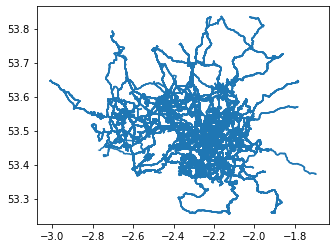

In [120]:
Lengthroute22.plot()

In [121]:
Lengthroute22.head(5)

,Name,length,geometry
0,100_C_I_1_,38.493460,"MULTILINESTRING Z ((-2.35772 53.46920 0.00000,..."
1,100_C_I_1_A,26.788575,"MULTILINESTRING Z ((-2.35355 53.46863 0.00000,..."
2,100_C_I_3_,38.493460,"MULTILINESTRING Z ((-2.35772 53.46920 0.00000,..."
3,100_C_I_3_A,26.788575,"MULTILINESTRING Z ((-2.35355 53.46863 0.00000,..."
4,100_C_I_4_,38.493460,"MULTILINESTRING Z ((-2.35772 53.46920 0.00000,..."


In [122]:
import re
Lengthroute22['Number']= Lengthroute22['Name'].map(lambda x:re.split(r'_+',x)[0])
Lengthroute22['Direction']= Lengthroute22['Name'].map(lambda x:re.split(r'_+',x)[1])
Lengthroute22['Service_Day']= Lengthroute22['Name'].map(lambda x:re.split(r'_+',x)[2])
Lengthroute22['Variation']= Lengthroute22['Name'].map(lambda x:re.split(r'_+',x)[3])
Lengthroute22.head(50)

,Name,length,geometry,Number,Direction,Service_Day,Variation
0,100_C_I_1_,38.493460,"MULTILINESTRING Z ((-2.35772 53.46920 0.00000,...",100,C,I,1
1,100_C_I_1_A,26.788575,"MULTILINESTRING Z ((-2.35355 53.46863 0.00000,...",100,C,I,1
2,100_C_I_3_,38.493460,"MULTILINESTRING Z ((-2.35772 53.46920 0.00000,...",100,C,I,3
3,100_C_I_3_A,26.788575,"MULTILINESTRING Z ((-2.35355 53.46863 0.00000,...",100,C,I,3
4,100_C_I_4_,38.493460,"MULTILINESTRING Z ((-2.35772 53.46920 0.00000,...",100,C,I,4
5,100_C_I_5_,38.493460,"MULTILINESTRING Z ((-2.35772 53.46920 0.00000,...",100,C,I,5
6,100_C_O_1_,37.564609,"MULTILINESTRING Z ((-2.35772 53.46920 0.00000,...",100,C,O,1
7,100_C_O_3_,37.564609,"MULTILINESTRING Z ((-2.59449 53.39123 0.00000,...",100,C,O,3
8,100_C_O_4_,37.564609,"MULTILINESTRING Z ((-2.59449 53.39123 0.00000,...",100,C,O,4
9,100_C_O_5_,37.564609,"MULTILINESTRING Z ((-2.35772 53.46920 0.00000,...",100,C,O,5


In [124]:
###check the Variation
LengthrouteTC=Lengthroute22.copy()
LengthrouteTC.head()

,Name,length,geometry,Number,Direction,Service_Day,Variation
0,100_C_I_1_,38.493460,"MULTILINESTRING Z ((-2.35772 53.46920 0.00000,...",100,C,I,1
1,100_C_I_1_A,26.788575,"MULTILINESTRING Z ((-2.35355 53.46863 0.00000,...",100,C,I,1
2,100_C_I_3_,38.493460,"MULTILINESTRING Z ((-2.35772 53.46920 0.00000,...",100,C,I,3
3,100_C_I_3_A,26.788575,"MULTILINESTRING Z ((-2.35355 53.46863 0.00000,...",100,C,I,3
4,100_C_I_4_,38.493460,"MULTILINESTRING Z ((-2.35772 53.46920 0.00000,...",100,C,I,4


In [125]:
for i in range(len(LengthrouteTC)):
    if LengthrouteTC.loc[i,'Direction'] not in ['I','O']:
        #if LengthrouteTC.loc[i,'Number'][-1].isdigit():
             LengthrouteTC.loc[i,'NumberA']=LengthrouteTC.loc[i,'Number']+LengthrouteTC.loc[i,'Direction']
    else: 
            LengthrouteTC.loc[i,'NumberA']=LengthrouteTC.loc[i,'Number']
    if LengthrouteTC.loc[i,'Variation'].isalpha():
         LengthrouteTC.loc[i,'NumberA']=LengthrouteTC.loc[i,'NumberA']+LengthrouteTC.loc[i,'Variation']
        
    i=i+1
LengthrouteTC.head(50)   

,Name,length,geometry,Number,Direction,Service_Day,Variation,NumberA
0,100_C_I_1_,38.493460,"MULTILINESTRING Z ((-2.35772 53.46920 0.00000,...",100,C,I,1,100C
1,100_C_I_1_A,26.788575,"MULTILINESTRING Z ((-2.35355 53.46863 0.00000,...",100,C,I,1,100C
2,100_C_I_3_,38.493460,"MULTILINESTRING Z ((-2.35772 53.46920 0.00000,...",100,C,I,3,100C
3,100_C_I_3_A,26.788575,"MULTILINESTRING Z ((-2.35355 53.46863 0.00000,...",100,C,I,3,100C
4,100_C_I_4_,38.493460,"MULTILINESTRING Z ((-2.35772 53.46920 0.00000,...",100,C,I,4,100C
5,100_C_I_5_,38.493460,"MULTILINESTRING Z ((-2.35772 53.46920 0.00000,...",100,C,I,5,100C
6,100_C_O_1_,37.564609,"MULTILINESTRING Z ((-2.35772 53.46920 0.00000,...",100,C,O,1,100C
7,100_C_O_3_,37.564609,"MULTILINESTRING Z ((-2.59449 53.39123 0.00000,...",100,C,O,3,100C
8,100_C_O_4_,37.564609,"MULTILINESTRING Z ((-2.59449 53.39123 0.00000,...",100,C,O,4,100C
9,100_C_O_5_,37.564609,"MULTILINESTRING Z ((-2.35772 53.46920 0.00000,...",100,C,O,5,100C


In [126]:
print(len(Lengthroute22.Number.unique()))
print(len(LengthrouteTC.NumberA.unique()))

624
784


In [130]:
LengthrouteTF1=LengthrouteTC[['length','geometry','Number','NumberA']]
print(LengthrouteTF1.shape)
print(len(LengthrouteTF1.NumberA.unique()))
LengthrouteTF = LengthrouteTF1.loc[LengthrouteTF1.groupby(['NumberA']).length.idxmax()]
LengthrouteTF.head()

(2870, 4)
784


,length,geometry,Number,NumberA
56,20.638355,"LINESTRING Z (-2.51845 53.49565 0.00000, -2.51...",10,10
2,38.493460,"MULTILINESTRING Z ((-2.35772 53.46920 0.00000,...",100,100C
15,17.847072,"MULTILINESTRING Z ((-2.28627 53.39224 0.00000,...",101,101
11,19.475334,"MULTILINESTRING Z ((-2.28627 53.39224 0.00000,...",101,101A
30,25.325028,"MULTILINESTRING Z ((-2.26259 53.38129 0.00000,...",103,103


In [131]:
print(LengthrouteTF.shape)
print(len(LengthrouteTF.NumberA.unique()))

(784, 4)
784


In [132]:
LengthrouteTF_N = LengthrouteTF1.loc[LengthrouteTF1.groupby(['Number']).length.idxmax()]
LengthrouteTF_N.head()

,length,geometry,Number,NumberA
471,24.961626,"MULTILINESTRING Z ((-2.42831 53.57539 0.00000,...",1,1B
56,20.638355,"LINESTRING Z (-2.51845 53.49565 0.00000, -2.51...",10,10
2,38.493460,"MULTILINESTRING Z ((-2.35772 53.46920 0.00000,...",100,100C
11,19.475334,"MULTILINESTRING Z ((-2.28627 53.39224 0.00000,...",101,101A
22,25.330893,"MULTILINESTRING Z ((-2.26259 53.38129 0.00000,...",103,103N


## 02 Modelling

In [21]:
import docplex
import cplex
from docplex.mp.model import Model
from docplex.cp.model import CpoModel
#opt_model = cpx.Model(name="MIP Model")
mdl = Model('MIP')
#mdl  = CpoModel(name = 'model')

In [12]:
import os
import codecs
import glob
import pandas as pd
import sys
import geopandas as gpd
import re
import fiona
import math
#try open street 
import networkx as nx
import osmnx as ox
import os
import folium
from folium import plugins
import webbrowser
import numpy as np

#import geopandas as gdp
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [13]:
from math import radians, cos, sin, asin, sqrt
def LLs2Dist(lat1, lon1, lat2, lon2):
    R = 6371
    dLat = (lat2 - lat1) * math.pi / 180.0
    dLon = (lon2 - lon1) * math.pi / 180.0

    a = math.sin(dLat / 2) * math.sin(dLat/2) + math.cos(lat1 * math.pi / 180.0) * math.cos(lat2 * math.pi / 180.0) * math.sin(dLon/2) * math.sin(dLon/2)
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
    dist = R * c*1.3
    return dist

In [14]:
#stations707shp=gpd.read_file('./data/TfGMgtfsnew/RouteFinalshp/stops_startend707.shp')
stations707shp=gpd.read_file('./data/TfGMgtfsnew/stops_startend604_436.shp')

stops_startendshp707=stations707shp.copy()

In [15]:
#RouteFinal_stopsshp2 = gpd.read_file('./data/TfGMgtfsnew/RouteFinalshp/RouteFinal_stops.shp') 
RouteFinal_707stops = gpd.read_file('./data/TfGMgtfsnew/RouteFinalshp/RouteFinal_604stops.shp') 
RouteFinal_707stops.rename(columns={'length':'length2'}, inplace=True)  

RouteFinal_707stops.head(2)

,Cpnumber_O,CpnNumber,Number,Cpnumber_A,Number_A,SingleDir,LnSermax,length2,Frqmin3,Ltmax3,LnSumyear,stop_nameS,stop_nameE,stop_lat_S,stop_lon_S,stop_lat_E,stop_lon_E,Ne_all_o,ODOr_all_o,index_righ,OBJECTID,BNG_E,BNG_N,LONG,LAT,Shape__Are,Shape__Len,geometry
0,ANWE245,ANWE245,245,ANWE245,245,0.0,49,18.598212,25.0,61.0,15808.0,Altrincham Interchange,The Trafford Centre Bus Station,53.387904,-2.347417,53.467384,-2.352404,5.0,294000.528556,None,2625,3818794,4014489,-22.7472,535.09303,1.275917e+09,712394.749516,"MULTILINESTRING ((-2.31222 53.44662, -2.31155 ..."
1,ANWE247,ANWE247,247,ANWE247,247,0.0,51,23.336705,10.0,57.0,12844.0,Altrincham Interchange,The Trafford Centre Bus Station,53.387904,-2.347417,53.467384,-2.352404,13.0,299736.643585,None,2625,3818794,4014489,-22.7472,535.09303,1.275917e+09,712394.749516,"MULTILINESTRING ((-2.35611 53.46650, -2.35632 ..."


In [16]:
#test distance fuctiion
gdf=RouteFinal_707stops.copy()
gdf707=RouteFinal_707stops.copy()
LLs2Dist(RouteFinal_707stops.loc[0,'stop_lat_E'],RouteFinal_707stops.loc[0,'stop_lon_E'],RouteFinal_707stops.loc[1,'stop_lat_E'],RouteFinal_707stops.loc[1,'stop_lon_E'])

0.0

In [17]:
# end to other stops
stops=stops_startendshp707.copy()
extra_d = np.zeros((604, 433), dtype=float)
for i in range(604):
    for j in range(433):
        extra_d[i][j]=LLs2Dist(gdf.loc[i,'stop_lat_E'],gdf.loc[0,'stop_lon_E'],stops.loc[j,'stop_lat'],stops.loc[j,'stop_lon'])

In [18]:
# start to other stops
extra_b = np.zeros((604, 433), dtype=float)
for i in range(604):
    for j in range(433):
        extra_b[i][j]=LLs2Dist(gdf.loc[i,'stop_lat_S'],gdf.loc[0,'stop_lon_S'],stops.loc[j,'stop_lat'],stops.loc[j,'stop_lon'])

### Coefficient/Constant

In [7]:
#cost  of oil bus or ebus
Ce=300000
Coil=191250

#cost  of fast and slow charging station 快充和慢充桩价格
Cchgf=21250
Cchgs=17000

# Ratio between charging pile and electric vehicle 快充和慢充桩的数量
Pchgf=0.5
Pchgs=0.8

#maintianiance per km
Ce_m =0.26 
Co_m =0.72   ##??

#energy cost per km
Ce_eng = 0.087   

#28.4 Liter per 100km, 136 pence per liter
Co_eng= 0.31

#Subsidy per e-bus 每辆车补贴
Subsidy =0


#Tax of co2 per kg
Taxco2=0

Bus_speed=30

# Coefficient of e-bus
#Electric vehicles are limited in quota and need to be charged for a certain distance of travel
SOC=0.3
Dirvingrange=300*(1-SOC)

#The battery needs to be changed after a certain distance of travel
Maxdrivingrange=300000

#cost of battary
Cba=137124
#charging time plus per single trip
#(20 minutes of charging in total), with a set break of 10 minutes,
#so the additional charging time for a single trip is 5min based on the return calculation
Chgtimeplus=5

#cost for per station

Stationcost=500000



### Decision variables

In [8]:
# if x is Binary
r707 = 604
s707=433

#Index_R = [c for c in range(0,r)]
set_I = [c for c in range(0,r707)]
set_J=[c for c in range(0,s707)]
set_IJ=[(i,j) for i in set_I for j in set_J]

#线路是否电气化
x=  mdl.binary_var_dict(set_I, name='x')

#车站是否是充电站
y= mdl.binary_var_dict(set_J, name='y')

#路线 i 是否在起点处到 车站j 处充电
w= mdl.binary_var_dict(set_IJ,name='w')

#路线 i 是否在终点处到 车站j 处充电
z= mdl.binary_var_dict(set_IJ,name='z')

numE=mdl.integer_var_dict(set_I,name='numE')
numO=mdl.integer_var_dict(set_I,name='numO')
ODO_rE=mdl.continuous_var_dict(set_I,name='ODO_rE')
ODO_rO=mdl.continuous_var_dict(set_I,name='DO_rO')

##路线 $i$ 额外距离:
extra_distance=mdl.continuous_var_dict(set_I,name='extra_distance')

### Constraints

In [ ]:
#for i in set_I:
   # for j in set_J:
      #  mdl.add_constraint(w[i,j] <= y[j])
      #  mdl.add_constraint(z[i,j] <= y[j])
        
for i in set_I:
    mdl.add_constraint(extra_distance[i] == mdl.sum(extra_b[i][j]*w[i,j] + extra_d[i][j]*z[i,j] for j in set_J)) 

for i in set_I:
    mdl.add_constraint(extra_distance[i] <=0.5)
              
for i in set_I:
    mdl.add_constraint(ODO_rE[i] >=0)

for i in set_I:
    mdl.add_constraint(ODO_rO[i] >=0)
for i in set_I:
    mdl.add_constraint(numE[i]>=0)
for i in set_I:
    mdl.add_constraint(numO[i]>=0)

for i in set_I:
    mdl.add_constraint(mdl.sum(w[i,j]+ z[i,j] for j in set_J) == x[i])


    # model.addConstrs((numE[i] >= (Definition of numE) - 1e6*(1-x[i])) for i in set_I)
for i in set_I:
    mdl.add_constraint(numE[i] >= (gdf.loc[i,'Ltmax3']*2 + 10*2 + gdf.loc[i,'chrgnumber']*10 + (gdf.loc[i,'chrgnumber']*extra_distance[i]/Bus_speed*60))/gdf.loc[i,'Frqmin3'] - 1e6*(1-x[i]))
    # model.addConstrs((numO[i] >= (Definition of numO) - 1e6*(1-x[i])) for i in set_I)
for i in set_I:
    mdl.add_constraint(numO[i] >= (gdf.loc[i,'Ltmax3'] +10)*2 /gdf.loc[i,'Frqmin3'] - 1e6*x[i])


    # model.addConstrs((ODO_rE[i] >= (Definition of ODOrE) - 1e12*x[i]) for i in set_I)
    #  #Detour 每个来回*12年充电次数
for i in set_I:
    mdl.add_constraint(ODO_rE[i] >= (extra_distance[i] * gdf.loc[i,'chrgNyear']+gdf.loc[i,'lengthyear']) - 1e12*(1-x[i]))

    # model.addConstrs((ODO_rO[i] >= (Definition of ODOrO) - 1e6*x[i]) for i in set_I)
for i in set_I:
    mdl.add_constraint(ODO_rO[i] >= gdf.loc[i,'lengthyear'] - 1e12*x[i])
    
    

###  Objective

In [12]:
The maximum service life of the two types of vehicles is set at 12 years, 
#but the electric bus may travel to a certain mileage and need to replace the battery, but its shell can still be used



#Ne*Ce + Noil*Coil + Nchgf*Cchgf +  Nchgs*Cchgs                  #One time investment
#+ODO_ed(Ce_m+Ce_eng) + ODO_o(Co_m+Co_eng) + +Cba * Fr          #12 years'  #Operating expenses
#Subsidy * Ne                                                    #Subsidy per e-bus   
#ODO_o * Emission * Taxco2                                       #Tax on emission   

total=mdl.sum((Ce+Pchgf*Cchgf+Pchgs*Cchgs-Subsidy)*numE[i]+(Coil+Taxco2)*numO[i]+(Ce_m+Ce_eng)*ODO_rE[i]+x[i]*gdf.loc[i,'Fr']*Cba+(Co_m+Co_eng)*ODO_rO[i] for i in set_I)+mdl.sum((y[j]*Stationcost) for j in set_J)


# for minimization
# model.minimize(objective)
mdl.minimize(total)

## solution

In [61]:
mdl.solve()


total_cost = mdl.objective_value
E_route_solution = [x[c].solution_value for c in set_I]
Stations_solution =[y[c].solution_value for c in set_S]

start_solution= np.zeros((604, 433), dtype=int)
end_solution= np.zeros((604, 433), dtype=int)
for i in range(604):
    for j in range(433):
        start_solution[i][j]=w[i,j].solution_value
        end_solution[i][j]=z[i,j].solution_value
    
ODO_rE_solution =[ODO_rE[c].solution_value for c in set_I]
ODO_rO_solution =[ODO_rO[c].solution_value for c in set_I]

numE_solution= [numE[c].solution_value for c in set_I]
numO_solution= [numO[c].solution_value for c in set_I]


E_route_solutiondf= pd.DataFrame(E_route_solution, columns=['WhetherE'])
Stations_solutiondf = pd.DataFrame(Stations_solution, columns=['WhetherS'])
start_solutiondf=pd.DataFrame(start_solution)
end_solutiondf=pd.DataFrame(end_solution)
numE_solutiondf = pd.DataFrame(numE_solution, columns=['numE'])
numO_solutiondf = pd.DataFrame(numO_solution, columns=['numO'])
ODO_rE_solutiondf=pd.DataFrame(ODO_rE_solution, columns=['ODO_rE'])
ODO_rO_solutiondf=pd.DataFrame(ODO_rO_solution, columns=['ODO_rO'])

print("Total Cost = %g" % total_cost)
print(E_route_solutiondf.WhetherE.sum())
print(Stations_solutiondf.WhetherS.sum())

Total Cost = 1.56018e+09
86.0
11.0


In [ ]:
#E_route_solutiondf.to_csv('./data/TfGMgtfsnew/solution_cost/parameter analysis/E_route_solution.csv')
#Stations_solutiondf.to_csv('./data/TfGMgtfsnew/solution_cost/parameter analysis/Stations_solution.csv')
#start_solutiondf.to_csv('./data/TfGMgtfsnew/solution_cost/parameter analysis/start_solution.csv')
#end_solutiondf.to_csv('./data/TfGMgtfsnew/solution_cost/parameter analysis/end_solution.csv')
#numE_solutiondf.to_csv('./data/TfGMgtfsnew/solution_cost/parameter analysis/numE_solution.csv')
#numO_solutiondf.to_csv('./data/TfGMgtfsnew/solution_cost/parameter analysis/numO_solution.csv')
#ODO_rE_solutiondf.to_csv('./data/TfGMgtfsnew/solution_cost/parameter analysis/ODO_rE_solution.csv')
#ODO_rO_solutiondf.to_csv('./data/TfGMgtfsnew/solution_cost/parameter analysis/ODO_rO_solution.csv')

11


<AxesSubplot:>

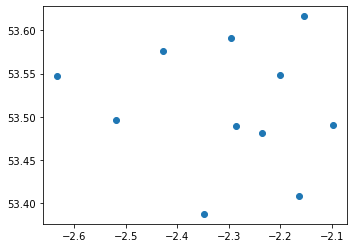

In [46]:
Stations_list1=pd.merge(Stations_solutiondf,stations707shp, how= 'left',left_index = True,   right_index = True)
Stations_listshp=Stations_list1[Stations_list1.WhetherS==1]
Stations_list=Stations_listshp.stop_name.to_list()
print(len(Stations_list))
Stations_list[:5]

Stations_listshp=gpd.GeoDataFrame(Stations_listshp, 
            geometry=gpd.points_from_xy(
                        Stations_listshp['stop_lon'], 
                        Stations_listshp['stop_lat'], 
                        crs='epsg:4326') )
Stations_listshp.plot()

In [16]:
E_route_solutiondf.head()

,WhetherE
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


In [17]:
Stations_solutiondf.head()

,WhetherS
0,1.0
1,1.0
2,1.0
3,0.0
4,0.0


In [18]:
Stations_list1=pd.merge(Stations_solutiondf,stations707shp, how= 'left',left_index = True,   right_index = True)
Stations_listshp=Stations_list1[Stations_list1.WhetherS==1].reset_index()
Stations_list=Stations_listshp.stop_name.to_list()
print(len(Stations_list))
Stations_list[:5]

11


['Altrincham Interchange',
 'Piccadilly Gardens',
 'Bolton Interchange',
 'Rochdale Interchange',
 'Middleton Bus Station']

In [22]:
Resultgdf707=Result_model(gdf707,E_route_solutiondf,Stations_listshp,Stations_list)
Resultgdf707[Resultgdf707.chrgtype !='oil'].NumBus.sum()

166.0

In [23]:
Resultgdf707.NumBus.sum()

3828.0

In [38]:
ResultgdfEE=Resultgdf707[Resultgdf707.chrgtype!='oil']
#Resultgdf707.to_csv('./data/final0906/mincost_route_604433.csv')
#ResultgdfEE.to_csv('./data/final0906/mincost_routeE_604433.csv')
#Stations_listshp.to_csv('./data/final0906/mincost_Stations_604433.csv')
ResultgdfEE.shape

(86, 34)

<AxesSubplot:>

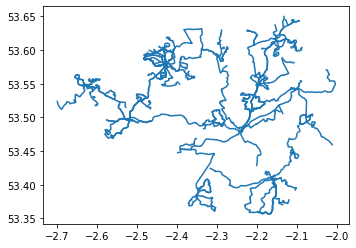

In [39]:
ResultgdfEE.plot()

In [62]:
E_route2=pd.merge(gdf,E_route_solutiondf,how= 'left',left_index = True,   right_index = True)
E_route22=pd.merge(E_route2,numE_solutiondf,how= 'left',left_index = True,   right_index = True)
E_route222=pd.merge(E_route22,numO_solutiondf,how= 'left',left_index = True,   right_index = True)
E_route2222=pd.merge(E_route222,ODO_rE_solutiondf,how= 'left',left_index = True,   right_index = True)
E_route22222=pd.merge(E_route2222,ODO_rO_solutiondf,how= 'left',left_index = True,   right_index = True)

#Calculation line charging station on which routes
for i in range(len(start_solutiondf)):
    for j in range(433):
        if start_solutiondf.loc[i,j]==1:
            E_route22222.loc[i,'chrgstation']=int(j)
        if end_solutiondf.loc[i,j]==1:
            E_route22222.loc[i,'chrgstation']=int(j)
            
costmodelfianlroute=E_route22222.copy()
costmodelfianlEroute=costmodelfianlroute[costmodelfianlroute.WhetherE==1]
ResultgdfEE=costmodelfianlEroute.copy()
costfianlstations=pd.merge(Stations_listshp,chrgpile, how= 'left',left_index = True,   right_on = 'chrgstation')
costfianlstations.head()

,index,WhetherS,stop_name,stop_lon,stop_lat,geometry,numE
0,0,1.0,Altrincham Interchange,-2.347417,53.387904,POINT (-2.34742 53.38790),16.0
1,1,1.0,Piccadilly Gardens,-2.235483,53.481442,POINT (-2.23548 53.48144),17.0
2,2,1.0,Bolton Interchange,-2.428121,53.575708,POINT (-2.42812 53.57571),46.0
3,15,1.0,Rochdale Interchange,-2.154211,53.616166,POINT (-2.15421 53.61617),15.0
4,27,1.0,Middleton Bus Station,-2.199887,53.547922,POINT (-2.19989 53.54792),35.0


In [ ]:
#costfianlstations=gpd.GeoDataFrame(costfianlstations, geometry= 'geometry',crs='epsg:4326')
#costmodelfianlEroute.to_file('./data/TfGMgtfsnew/solution_cost/costmodelfianlEroute.shp') 
#costmodelfianlroute.to_file('./data/TfGMgtfsnew/solution_cost/costmodelfianlroute.shp') 
#costfianlstations.to_file('./data/TfGMgtfsnew/solution_cost/costfianlstations.shp') 

### making maps

In [31]:
import json
import requests
import io

def download_Json(url, name):
    print("-----------downloading json %s" % (url))
    try:
        # 将响应信息进行json格式化
        response = requests.get(url)
        versionInfo = response.text
        versionInfoPython = json.loads(versionInfo)

        # print(versionInfo)
        path = "./data/" + str(name) + ".json"
        # 将json格式化的数据保存
        with open(path, 'w', encoding='utf-8') as f1:
            f1.write(json.dumps(versionInfoPython, indent=4))
        print("success，to save：" + path)
    except Exception as ex:
        print("--------wrong----")
        pass


url='https://opendata.arcgis.com/datasets/c3301af91da04b9bbe6120c2adc17091_0.geojson'
url2='https://opendata.arcgis.com/datasets/7a0667ee8e4640e699a797acab6f0b3a_0.geojson'
download_Json(url, 'GM')
download_Json(url2, 'GM2')

Boundary1= gpd.read_file('./data/GM.json') 
Boundary= gpd.read_file('./data/GM2.json') 
Boundary.head()

-----------downloading json https://opendata.arcgis.com/datasets/c3301af91da04b9bbe6120c2adc17091_0.geojson
success，to save：./data/GM.json
-----------downloading json https://opendata.arcgis.com/datasets/7a0667ee8e4640e699a797acab6f0b3a_0.geojson
success，to save：./data/GM2.json


,OBJECTID,LAD16CD,LAD16NM,LAD16NMW,BNG_E,BNG_N,LONG,LAT,Shape__Area,Shape__Length,geometry
0,1,E06000001,Hartlepool,,447157,531476,-1.27023,54.67616,9.359786e+07,69382.685924,"MULTIPOLYGON (((-1.24197 54.72246, -1.24252 54..."
1,2,E06000002,Middlesbrough,,451141,516887,-1.21099,54.54467,5.387900e+07,42085.584812,"MULTIPOLYGON (((-1.19706 54.58179, -1.19440 54..."
2,3,E06000003,Redcar and Cleveland,,464359,519597,-1.00611,54.56752,2.448388e+08,96189.660709,"MULTIPOLYGON (((-1.20098 54.57763, -1.20030 54..."
3,4,E06000004,Stockton-on-Tees,,444937,518183,-1.30669,54.55691,2.049366e+08,115439.477112,"MULTIPOLYGON (((-1.22289 54.62587, -1.22496 54..."
4,5,E06000005,Darlington,,428029,515649,-1.56835,54.53535,1.974820e+08,105799.568559,"POLYGON ((-1.63800 54.61720, -1.63767 54.61670..."


In [32]:
GBboundary=gpd.read_file('./data/Middle_Layer_Super_Output_Areas_(December_2011)_Boundaries/Middle_Layer_Super_Output_Areas_(December_2011)_Boundaries.shp').to_crs('EPSG:4326')
Boundary1=gpd.read_file('./data/GM.json').to_crs('EPSG:4326')
Boundary=gpd.read_file('./data/GM2.json').to_crs('EPSG:4326')

In [33]:
GMrailway=gpd.read_file('./data/greater-manchester-latest-free/gis_osm_railways_free_1.shp').to_crs('EPSG:4326')

<AxesSubplot:>

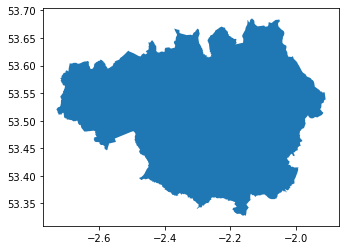

In [34]:
LAD16CD=Boundary1[Boundary1.CAUTH16CD=='E47000001'].LAD16CD.to_list()
LAD16CD[:5]
GMBoundary=Boundary[Boundary.LAD16CD.isin(LAD16CD)]

GMdissolve=GMBoundary.dissolve(by="LAD16NMW",aggfunc="sum")
GMdissolve.plot()

<AxesSubplot:>

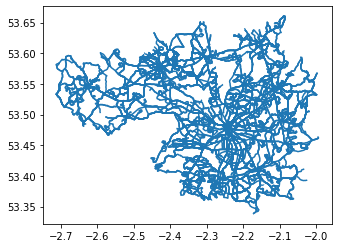

In [35]:
routetest=gpd.sjoin(gdf2, GMdissolve,op='within',rsuffix='right')
#routetest = gpd.overlay(gdf2, , how='union')
routetest.plot()

In [53]:
stopstest=gpd.read_file('./data/TfGMgtfsnew/stops_startend604_433.shp')
stopstest.shape

(433, 12)

In [51]:
#Eroute's start and stop
T1604=ResultgdfEE[['stop_nameS','stop_lon_S','stop_lat_S']].drop_duplicates()
T1604.rename(columns={'stop_nameS':'stop_name','stop_lon_S':'stop_lon','stop_lat_S':'stop_lat'}, inplace=True) 
T2604=ResultgdfEE[['stop_nameE','stop_lon_E','stop_lat_E']].drop_duplicates()
T2604.rename(columns={'stop_nameE':'stop_name','stop_lon_E':'stop_lon','stop_lat_E':'stop_lat'}, inplace=True) 
costmodelrouteSE=pd.concat([T1604,T2604],axis=0).drop_duplicates()

costmodelrouteSE2=gpd.GeoDataFrame(costmodelrouteSE, 
            geometry=gpd.points_from_xy(
                       costmodelrouteSE['stop_lon'], 
                        costmodelrouteSE['stop_lat'], 
                        crs='epsg:4326') )
costmodelrouteSE2=gpd.sjoin(costmodelrouteSE2, GMdissolve,op='within')
#Stations_listshp=Stations_list1[Stations_list1.WhetherS==1]
Stations_listshp2=gpd.sjoin(Stations_listshp, GMdissolve,op='within')

In [52]:
#Eroute's start and stop
T1604=ResultgdfEE[['stop_nameS','stop_lon_S','stop_lat_S']].drop_duplicates()
T1604.rename(columns={'stop_nameS':'stop_name','stop_lon_S':'stop_lon','stop_lat_S':'stop_lat'}, inplace=True) 
T2604=ResultgdfEE[['stop_nameE','stop_lon_E','stop_lat_E']].drop_duplicates()
T2604.rename(columns={'stop_nameE':'stop_name','stop_lon_E':'stop_lon','stop_lat_E':'stop_lat'}, inplace=True) 
costmodelrouteSE=pd.concat([T1604,T2604],axis=0).drop_duplicates()

costmodelrouteSE2=gpd.GeoDataFrame(costmodelrouteSE, 
            geometry=gpd.points_from_xy(
                       costmodelrouteSE['stop_lon'], 
                        costmodelrouteSE['stop_lat'], 
                        crs='epsg:4326') )
costmodelrouteSE2=gpd.sjoin(costmodelrouteSE2, GMdissolve,op='within')
Stations_listshp2=gpd.sjoin(Stations_listshp, GMdissolve,op='within')

(53.31, 53.72)

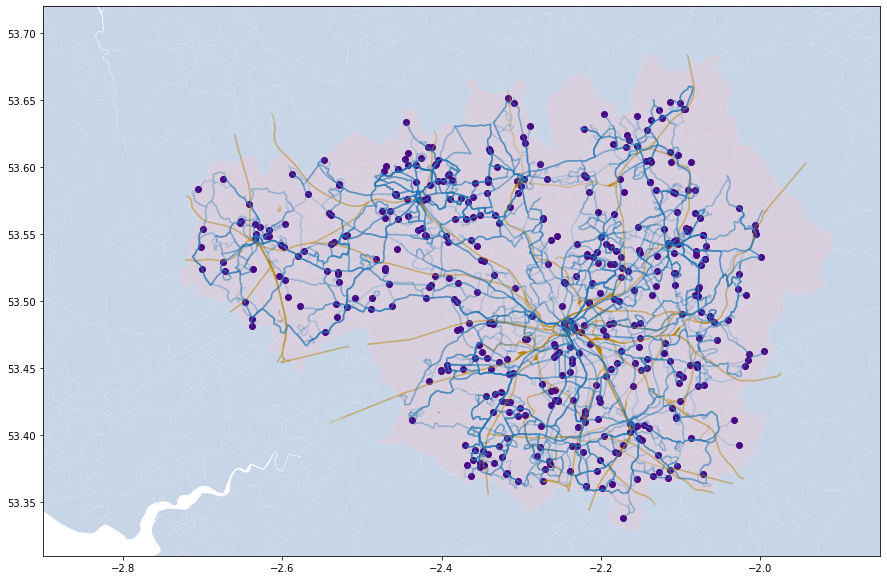

In [55]:
import matplotlib.pyplot as plt
xmin=-2.9
xmax=-1.85
ymin=53.31
ymax=53.72
fig, ax = plt.subplots (figsize = (15,18))
GBboundary.plot(ax = ax, alpha = 0.7, color = "lightsteelblue")
GMBoundary.plot(ax = ax, alpha = 0.3, color = "pink")
GMrailway.plot(ax = ax, alpha = 0.3, color = "darkgoldenrod")
routetest.plot(ax = ax,alpha = 0.2)
#ResultgdfEE.plot(ax = ax,alpha = 0.5,  color = "green")
#costmodelrouteSE2.plot(ax = ax, color = "indigo")
stopstest.plot(ax = ax, color = "indigo")
#Stations_listshp2.plot(ax = ax, color = "red", marker='D',markersize=50)
ax.set_xlim([xmin, xmax])
ax.set_ylim([ymin, ymax])
#fig.savefig('D:/CODE/python anaconda/00Dissertation python/data/final0906/image/DR450.png', dpi=300, transparent=True)

(53.31, 53.72)

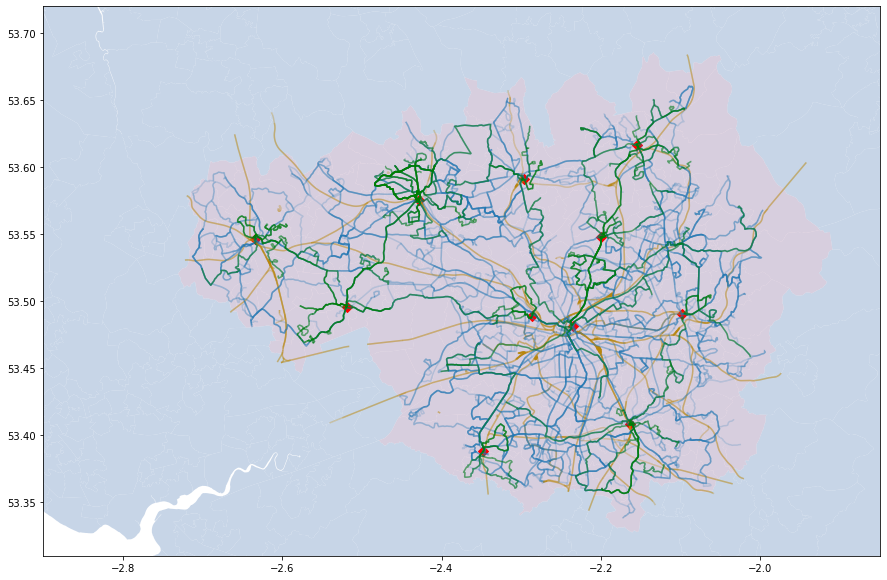

In [56]:
import matplotlib.pyplot as plt
xmin=-2.9
xmax=-1.85
ymin=53.31
ymax=53.72
fig, ax = plt.subplots (figsize = (15,18))
GBboundary.plot(ax = ax, alpha = 0.7, color = "lightsteelblue")
GMBoundary.plot(ax = ax, alpha = 0.3, color = "pink")
GMrailway.plot(ax = ax, alpha = 0.3, color = "darkgoldenrod")
routetest.plot(ax = ax,alpha = 0.2)
ResultgdfEE.plot(ax = ax,alpha = 0.5,  color = "green")
#costmodelrouteSE2.plot(ax = ax, color = "indigo")
#stopstest.plot(ax = ax, color = "indigo")
Stations_listshp2.plot(ax = ax, color = "red", marker='D',markersize=50)
ax.set_xlim([xmin, xmax])
ax.set_ylim([ymin, ymax])
#fig.savefig('D:/CODE/python anaconda/00Dissertation python/data/final0906/image/DR450.png', dpi=300, transparent=True)

### all diesel bus situation

In [24]:
gdf2=RouteFinal_707stops.copy()
for i in range(len(gdf2)):
    gdf2.loc[i,'Ne_all_o']=round((gdf2.loc[i,'Ltmax3'] +10)*2 /gdf2.loc[i,'Frqmin3'])
    gdf2.loc[i,'ODOr_all_o']=gdf2.loc[i,'LnSumyear']*gdf2.loc[i,'length2']*12
gdf2.head()

,Cpnumber_O,CpnNumber,Number,Cpnumber_A,Number_A,SingleDir,LnSermax,length2,Frqmin3,Ltmax3,LnSumyear,stop_nameS,stop_nameE,stop_lat_S,stop_lon_S,stop_lat_E,stop_lon_E,Ne_all_o,ODOr_all_o,index_righ,OBJECTID,BNG_E,BNG_N,LONG,LAT,Shape__Are,Shape__Len,geometry
0,ANWE245,ANWE245,245,ANWE245,245,0.0,49,18.598212,25.0,61.0,15808.0,Altrincham Interchange,The Trafford Centre Bus Station,53.387904,-2.347417,53.467384,-2.352404,5.0,3.528006e+06,None,2625,3818794,4014489,-22.7472,535.09303,1.275917e+09,712394.749516,"MULTILINESTRING ((-2.31222 53.44662, -2.31155 ..."
1,ANWE247,ANWE247,247,ANWE247,247,0.0,51,23.336705,10.0,57.0,12844.0,Altrincham Interchange,The Trafford Centre Bus Station,53.387904,-2.347417,53.467384,-2.352404,13.0,3.596840e+06,None,2625,3818794,4014489,-22.7472,535.09303,1.275917e+09,712394.749516,"MULTILINESTRING ((-2.35611 53.46650, -2.35632 ..."
2,ANWE263,ANWE263,263,ANWE263,263,0.0,100,15.324950,3.0,66.0,20124.0,Piccadilly Gardens,Altrincham Interchange,53.481442,-2.235483,53.387904,-2.347417,50.0,3.700792e+06,None,2625,3818794,4014489,-22.7472,535.09303,1.275917e+09,712394.749516,"MULTILINESTRING ((-2.31642 53.43374, -2.31609 ..."
3,ANWE534,ANWE534,534,ANWE534,534,0.0,96,4.901237,5.0,30.0,22568.0,Bolton Interchange,Oldhams Estate Terminus,53.575708,-2.428121,53.605986,-2.446260,16.0,1.327333e+06,None,2625,3818794,4014489,-22.7472,535.09303,1.275917e+09,712394.749516,"MULTILINESTRING ((-2.43245 53.57712, -2.43266 ..."
4,ANWE575,ANWE575,575,ANWE575,575,0.0,102,24.727155,10.0,75.0,31200.0,Bolton Interchange,Wigan Bus Station,53.575708,-2.428121,53.546614,-2.634072,17.0,9.257847e+06,None,2625,3818794,4014489,-22.7472,535.09303,1.275917e+09,712394.749516,"MULTILINESTRING ((-2.55365 53.60119, -2.55385 ..."


In [26]:
gdf2.Ne_all_o.sum()

3743.0

In [27]:
gdf2.ODOr_all_o.sum()

829038610.0065229

In [28]:
gdf2.ODOr_all_o.max()

15495710.31502362

In [29]:
Total_all_oil=gdf2.Ne_all_o.sum()*Coil+ gdf2.ODOr_all_o.sum()*(Co_m+Co_eng) +gdf2.Ne_all_o.sum()*  Taxco2 
Total_all_oil

1569758518.3067186